In [359]:
!pip install scorecardpy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from dateutil.parser import parse
from datetime import datetime
import scorecardpy as sc
df_train = pd.read_csv('/Users/amirzoyeva/Desktop/scoring/tr_for_students.csv')


target = df_train['def']
df_start = df_train.copy()
df_train.head()

issue_d             purpose addr_state sub_grade home_ownership  \
0  2012-01-01  debt_consolidation         IL        C3           RENT   
1  2013-01-01  debt_consolidation         FL        B4       MORTGAGE   
2  2013-07-01  debt_consolidation         NJ        B5           RENT   
3  2014-03-01  debt_consolidation         MI        C2       MORTGAGE   
4  2013-10-01         credit_card         TX        D2       MORTGAGE   

                     emp_title  installment    dti  funded_amnt  annual_inc  \
0  Chicago Shakespeare Theatre       172.48  16.39         5000     21600.0   
1               Queen of Pawns       674.94  16.31        20000     95000.0   
2                 tek services       809.24  14.01        24000     90000.0   
3            Inventory Control       342.56  14.51        10000     43000.0   
4             Business Analyst       473.58  22.65        13000     62000.0   

   ...  mths_since_recent_inq  delinq_2yrs  chargeoff_within_12_mths  \
0  ...                    NaN            0                         0   
1  ...                    4.0            0                         0   
2  ...                   19.0            0                         0   
3  ...                    5.0            1                         1   
4  ...                    5.0            0                         0   

   num_accts_ever_120_pd  num_tl_90g_dpd_24m  acc_open_past_24mths  \
0                    NaN                 NaN                   NaN   
1                    0.0                 0.0                   4.0   
2                    0.0                 0.0                   5.0   
3                    4.0                 1.0                   3.0   
4                    0.0                 0.0                   5.0   

   avg_cur_bal  tot_hi_cred_lim  delinq_amnt  def  
0          NaN              NaN            0    0  
1      23735.0         153379.0            0    0  
2       4070.0          50834.0            0    0  
3       1127.0          32683.0            0    0  
4       3443.0          59495.0            0    0  

[5 rows x 23 columns]

In [361]:
df_train.columns

Index(['issue_d', 'purpose', 'addr_state', 'sub_grade', 'home_ownership',
       'emp_title', 'installment', 'dti', 'funded_amnt', 'annual_inc',
       'emp_length', 'term', 'inq_last_6mths', 'mths_since_recent_inq',
       'delinq_2yrs', 'chargeoff_within_12_mths', 'num_accts_ever_120_pd',
       'num_tl_90g_dpd_24m', 'acc_open_past_24mths', 'avg_cur_bal',
       'tot_hi_cred_lim', 'delinq_amnt', 'def'],
      dtype='object')

Для начала посмотрим на общие характеристики датасета 

In [362]:
df_train.describe()

installment           dti   funded_amnt    annual_inc    emp_length  \
count  61169.000000  61169.000000  61169.000000  6.116900e+04  58495.000000   
mean     432.671268     16.782808  14159.664618  7.271755e+04      6.025284   
std      243.699189      7.531950   8181.125909  4.954698e+04      3.597447   
min        4.930000      0.000000   1000.000000  6.695000e+03      0.000000   
25%      257.540000     11.180000   8000.000000  4.500000e+04      3.000000   
50%      382.490000     16.500000  12000.000000  6.250000e+04      6.000000   
75%      565.310000     22.200000  20000.000000  8.800000e+04     10.000000   
max     1408.130000     34.990000  35000.000000  3.900000e+06     10.000000   

               term  inq_last_6mths  mths_since_recent_inq   delinq_2yrs  \
count  61169.000000    61169.000000           47640.000000  61169.000000   
mean      42.276120        0.831254               6.963098      0.259069   
std       10.546991        1.072571               5.848962      0.761321   
min       36.000000        0.000000               0.000000      0.000000   
25%       36.000000        0.000000               2.000000      0.000000   
50%       36.000000        0.000000               6.000000      0.000000   
75%       60.000000        1.000000              10.000000      0.000000   
max       60.000000        8.000000              24.000000     29.000000   

       chargeoff_within_12_mths  num_accts_ever_120_pd  num_tl_90g_dpd_24m  \
count              61169.000000           49228.000000        49228.000000   
mean                   0.006458               0.389920            0.077009   
std                    0.089726               1.065534            0.435189   
min                    0.000000               0.000000            0.000000   
25%                    0.000000               0.000000            0.000000   
50%                    0.000000               0.000000            0.000000   
75%                    0.000000               0.000000            0.000000   
max                    3.000000              29.000000           20.000000   

       acc_open_past_24mths    avg_cur_bal  tot_hi_cred_lim   delinq_amnt  \
count          53283.000000   49224.000000     4.922800e+04  61169.000000   
mean               4.033763   13734.641049     1.671557e+05     12.090634   
std                2.659302   16054.221586     1.699201e+05    720.055058   
min                0.000000       0.000000     0.000000e+00      0.000000   
25%                2.000000    3025.000000     4.550000e+04      0.000000   
50%                4.000000    7847.000000     1.110695e+05      0.000000   
75%                5.000000   19527.000000     2.458785e+05      0.000000   
max               33.000000  354015.000000     9.999999e+06  70076.000000   

                def  
count  61169.000000  
mean       0.159591  
std        0.366229  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [363]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61169 entries, 0 to 61168
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   issue_d                   61169 non-null  object 
 1   purpose                   61169 non-null  object 
 2   addr_state                61169 non-null  object 
 3   sub_grade                 61169 non-null  object 
 4   home_ownership            61169 non-null  object 
 5   emp_title                 57304 non-null  object 
 6   installment               61169 non-null  float64
 7   dti                       61169 non-null  float64
 8   funded_amnt               61169 non-null  int64  
 9   annual_inc                61169 non-null  float64
 10  emp_length                58495 non-null  float64
 11  term                      61169 non-null  int64  
 12  inq_last_6mths            61169 non-null  int64  
 13  mths_since_recent_inq     47640 non-null  float64
 14  delinq

## EDA ##

Нашей целевой переменной является переменная def: в ней содержится решение по выдаче или не выдаче кредита, а точнее будет ли у данного клиента дефолт - значение 1 или нет- значение 0.
Посмотрим на распределение результатов в нашей выборке :

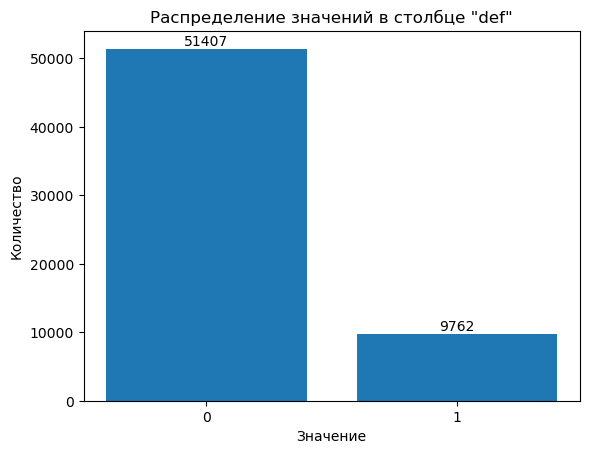

In [364]:

count_def = df_train['def'].value_counts()


plt.bar(count_def.index, count_def.values)

plt.title('Распределение значений в столбце "def"')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.xticks(count_def.index)

for i, value in enumerate(count_def.values):
    plt.text(i, value, str(value), ha='center', va='bottom')


plt.show()

# Корреляция признаков #

Для начала посмотрим на корреляцию признаков и рассмотрим детальнее самые сильные зависимости и постараемся логически объяснить их для дальнейшего понимания данных

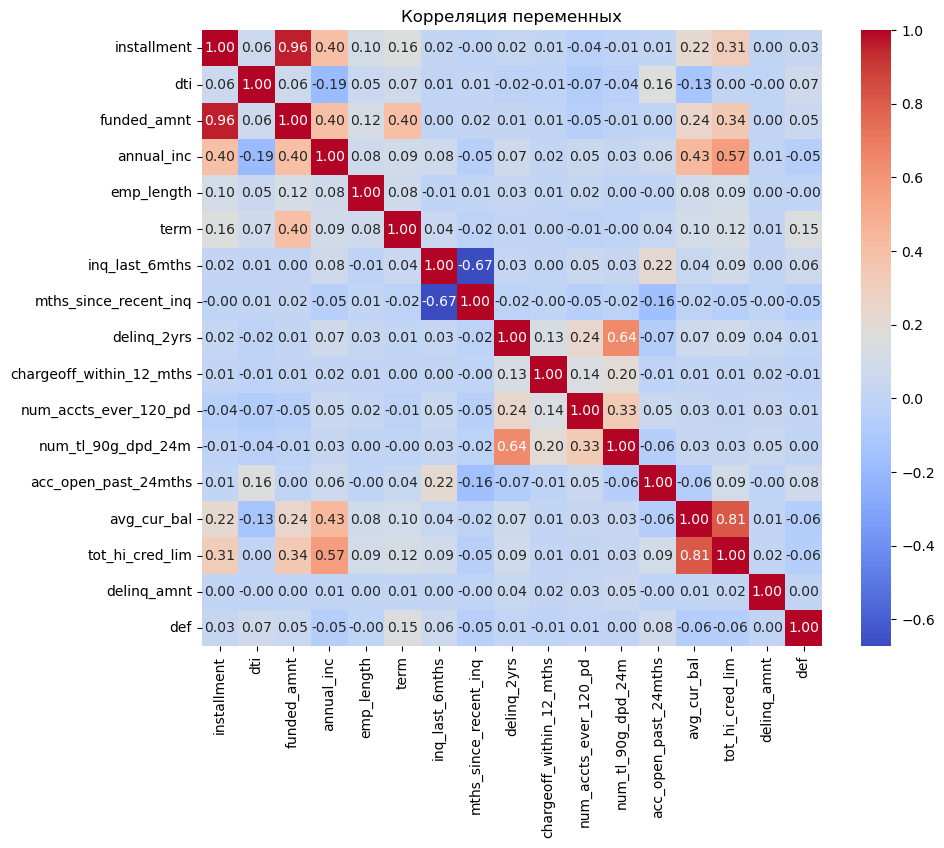

In [365]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Корреляция переменных')  
plt.show()  

Сразу заметна очень высокая корреляция  у переменных:

installment - The monthly payment owed by the borrower if the loan originates.

funded_amnt - The total amount committed to that loan at that point in time.
Посмотрим детальнее на зависимость между этими переменными на диаграммах:


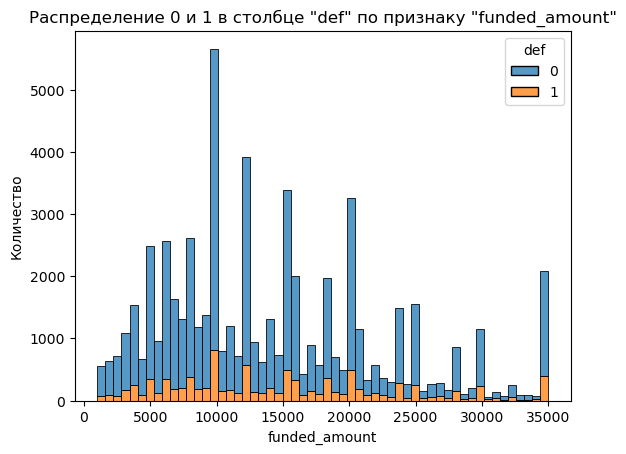

In [366]:
sns.histplot(data=df_train, x='installment', hue='def', multiple='stack')
plt.title('Распределение 0 и 1 в столбце "def" по признаку "installment"')
plt.xlabel('installment')
plt.ylabel('Количество')


plt.show()


sns.histplot(data=df_train, x='funded_amnt', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "funded_amount"')
plt.xlabel('funded_amount')
plt.ylabel('Количество')

plt.show()

<AxesSubplot:xlabel='installment', ylabel='funded_amnt'>

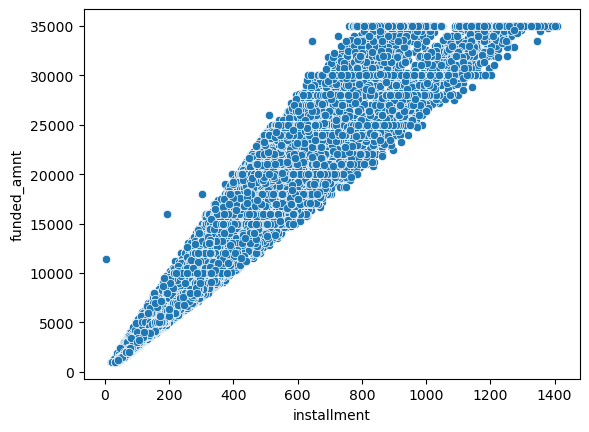

In [367]:
sns.scatterplot(data=df_train, x="installment", y="funded_amnt")

Очевидна строго положительная корреляция между переменными, что в целом очевидно:
чем больше ежемесячный платеж (installment), тем больше вся сумма, выделенная на этот кредит (funded_amnt)

Если исходить из обывательской логики, то можно выдвинуть гипотезу о том, что размер ежемесячного платежа влияет на вероятность дефолта: скорее всего клиент с бОльшим платежом более склонен к невыплате кредита, чем тот, кто взял небольшой кредит

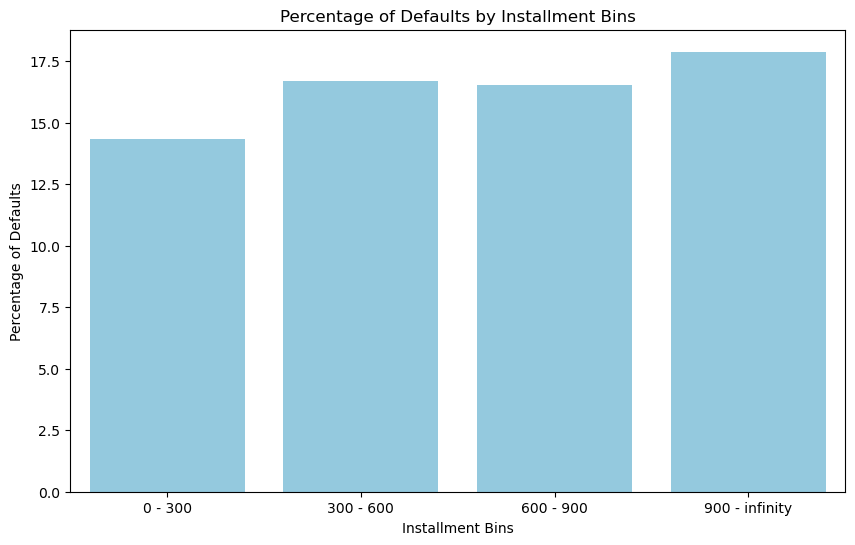

In [368]:
bins = [0, 300, 600, 900, np.inf]
labels = ['0 - 300', '300 - 600', '600 - 900', '900 - infinity']

df_train['installment_bins'] = pd.cut(df_train['installment'], bins=bins, labels=labels, right=False)

count_total = df_train.groupby(['installment_bins']).agg({'installment':'count'}).reset_index()
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['installment_bins']).agg({'installment':'count'}).reset_index()
merged_counts = pd.merge(count_total, count_1, on='installment_bins', suffixes=('_total', '_1'))

merged_counts['percentage'] = (merged_counts['installment_1'] / merged_counts['installment_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='installment_bins', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('Installment Bins')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Installment Bins')


plt.show()
df_train.drop(columns=['installment_bins'], inplace= True)

Однако на данных мы видим, что доля дефолтов (дефолт-рейт) в целом не сильно отличается от  размера ежемесячного платежа

Еще достаточно высокая корреляция наблюдается между переменными tot_hi_credit_lim и avg_cur_bal
Также детально рассмотрим эти переменные

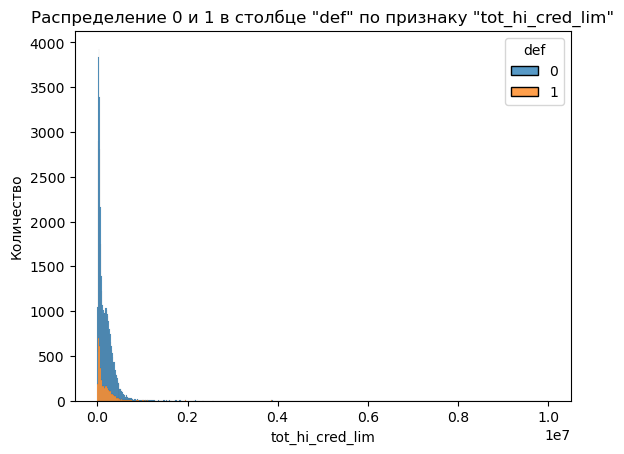

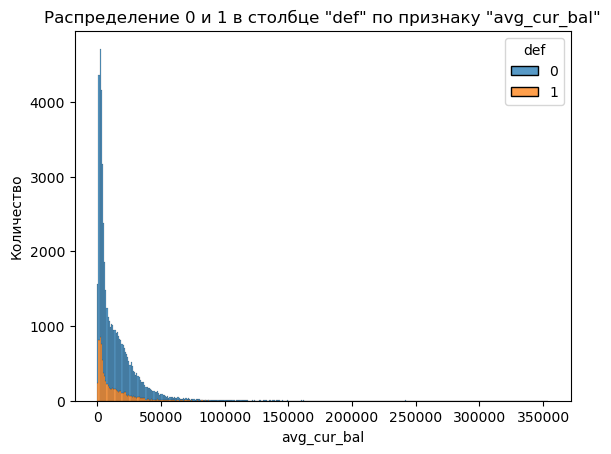

<AxesSubplot:xlabel='tot_hi_cred_lim', ylabel='avg_cur_bal'>

In [369]:
sns.histplot(data=df_train, x='tot_hi_cred_lim', hue='def', multiple='stack')
plt.title('Распределение 0 и 1 в столбце "def" по признаку "tot_hi_cred_lim"')
plt.xlabel('tot_hi_cred_lim')
plt.ylabel('Количество')


plt.show()


sns.histplot(data=df_train, x='avg_cur_bal', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "avg_cur_bal"')
plt.xlabel('avg_cur_bal')
plt.ylabel('Количество')
plt.show()
sns.scatterplot(data=df_train, x='tot_hi_cred_lim', y='avg_cur_bal')


На диаграмме рассеяния видна положительная корреляция переменных, что также достаточно логично.
Кредитный лимит клиента должен прямо положительно зависеть от баланса счетов: если на счетах у человека большое количество средств,то он будет более кредитоспособным


Рассмотрим дефолт рейт по среднему балансу счетов клиента: 
по статистике заметим, что люди с меньшим количеством денег на счетах более склонны к дефолту. Также по распределению дефолт-рейта по этой категории можно сделать предположение, что данная переменная будет обладать большой предсказательной способностью.

In [370]:
bins = [0, 10000, 30000, 50000, 80000, np.inf]
labels = ['0 - 10000', '10000- 30000', '30000 - 50000', '50000 - 80000', '80000 - inf']

df_train['av_bins'] = pd.cut(df_train['avg_cur_bal'], bins=bins, labels=labels, right=False)

count_total = df_train.groupby(['av_bins']).agg({'avg_cur_bal':'count'}).reset_index()
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['av_bins']).agg({'avg_cur_bal':'count'}).reset_index()
merged_counts = pd.merge(count_total, count_1, on='av_bins', suffixes=('_total', '_1'))

merged_counts['percentage'] = (merged_counts['avg_cur_bal_1'] / merged_counts['avg_cur_bal_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='av_bins', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('Average Current Balance  Bins')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Average Current Bins')


plt.show()
df_train.drop(columns=['av_bins'], inplace= True)

При более детальном рассмотрении еще одной пары переменных, имеющих выделенную корреляцию:
mths_since_recent_inq - Months since most recent inquiry.

inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries).


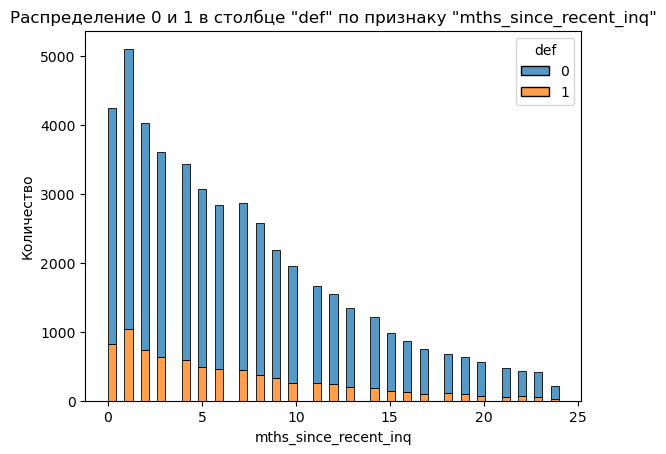

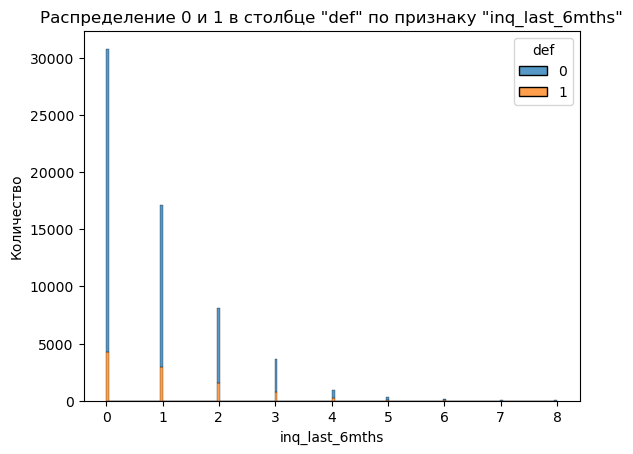

<AxesSubplot:xlabel='inq_last_6mths', ylabel='mths_since_recent_inq'>

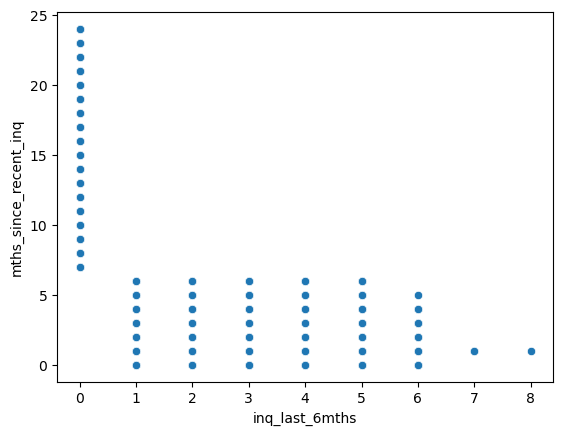

In [371]:
sns.histplot(data=df_train, x='mths_since_recent_inq', hue='def', multiple='stack')
plt.title('Распределение 0 и 1 в столбце "def" по признаку "mths_since_recent_inq"')
plt.xlabel('mths_since_recent_inq')
plt.ylabel('Количество')


plt.show()


sns.histplot(data=df_train, x='inq_last_6mths', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "inq_last_6mths"')
plt.xlabel('inq_last_6mths')
plt.ylabel('Количество')
plt.show()
sns.scatterplot(data=df_train, x='inq_last_6mths', y='mths_since_recent_inq')

Достаточно странная корреляция на первый взгляд, но давайте разберемся детальнее:
inq_last_6mths - обращения за займом в последние 6 месяца, а mths_since_recent_inq - сколько месяцев прошло с последнего запроса. Именно исходя из описания переменных получаем ответ на вопрос  почему при нулевом inq_last_6mnths такие высокие значения mths_since_recent_inq - просто в последние 6 месяцев запроса от клиента не было, поэтому месяцев с последнего запроса намного больше 6. 
Это простое наблюдение будет в дальнейшем использовано при заполнении пропусков в данных.

И завершающая пара коррелированных переменных это "num_tl_90g_dpd_24m" и 'delinq_2yrs'. Рассмотрим их распределение:

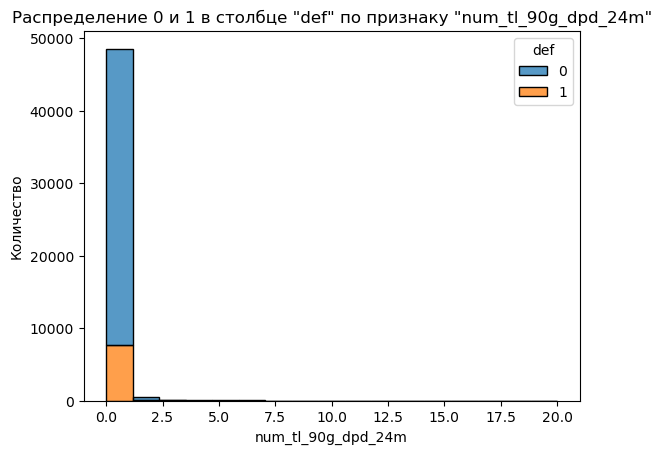

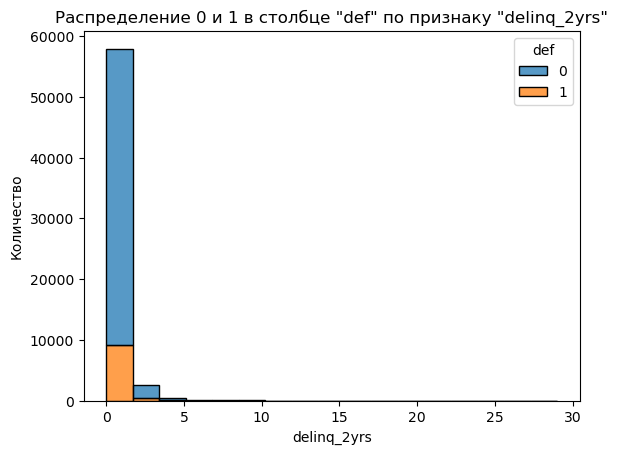

<AxesSubplot:xlabel='num_tl_90g_dpd_24m', ylabel='delinq_2yrs'>

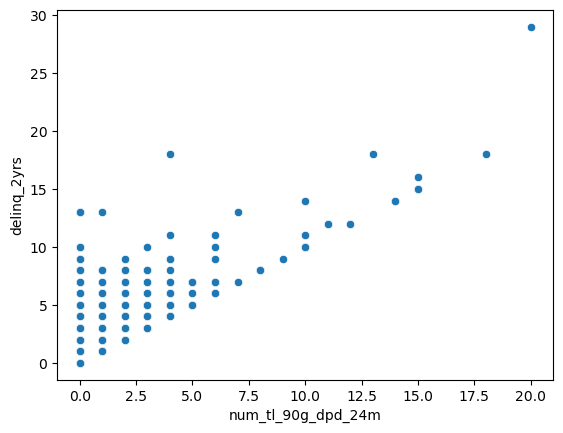

In [372]:
sns.histplot(data=df_train, x='num_tl_90g_dpd_24m', hue='def', multiple='stack')
plt.title('Распределение 0 и 1 в столбце "def" по признаку "num_tl_90g_dpd_24m"')
plt.xlabel('num_tl_90g_dpd_24m')
plt.ylabel('Количество')


plt.show()


sns.histplot(data=df_train, x='delinq_2yrs', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "delinq_2yrs"')
plt.xlabel('delinq_2yrs')
plt.ylabel('Количество')
plt.show()
sns.scatterplot(data=df_train, x='num_tl_90g_dpd_24m', y='delinq_2yrs')

Можем заметить, что эти переменные имеют положительную корреляцию, а также их распределение практически дублирует друг друга. Да и по описанию этих переменных явно видно, что они несут практически один и тот же смысл. 


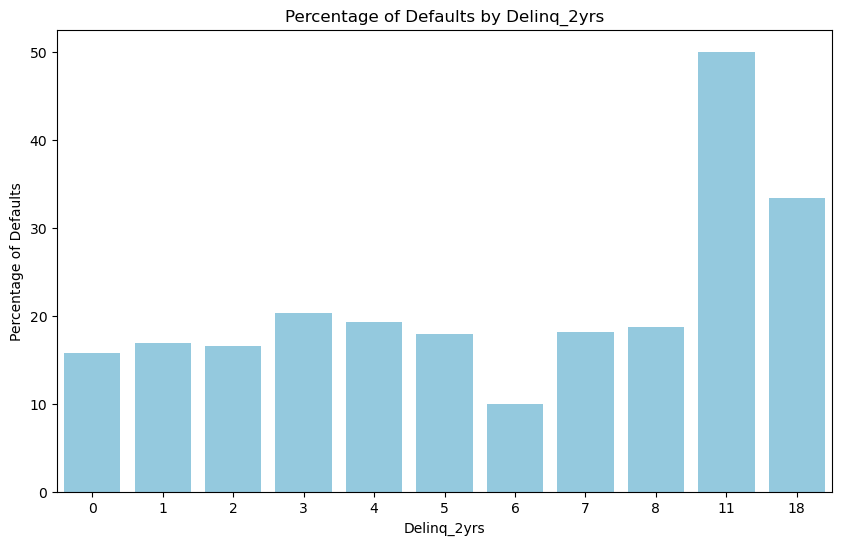

In [373]:


count_total = df_train.groupby(['delinq_2yrs']).agg({'issue_d':'count'}).reset_index()
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['delinq_2yrs']).agg({'issue_d':'count'}).reset_index()

merged_counts = pd.merge(count_total, count_1, on='delinq_2yrs', suffixes=('_total', '_1'))
merged_counts
merged_counts['percentage'] = (merged_counts['issue_d_1'] / merged_counts['issue_d_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='delinq_2yrs', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('Delinq_2yrs')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Delinq_2yrs')


plt.show()


In [374]:
count_total = df_train.groupby(['num_tl_90g_dpd_24m']).agg({'issue_d':'count'}).reset_index()
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['num_tl_90g_dpd_24m']).agg({'issue_d':'count'}).reset_index()

merged_counts = pd.merge(count_total, count_1, on='num_tl_90g_dpd_24m', suffixes=('_total', '_1'))
merged_counts
merged_counts['percentage'] = (merged_counts['issue_d_1'] / merged_counts['issue_d_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='num_tl_90g_dpd_24m', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('num_tl_90g_dpd_24m')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by num_tl_90g_dpd_24m')


plt.show()


По диаграммам дефолт-рейтов обнаружим, что в целом распределения на них тоже похожи, поэтому каждая из переменных, скорее всего,  будет иметь высокую предсказательную способность

Из-за вышесказанного попробуем удалить одну из переменных, чтобы не перегружать модель лишними признаками.

In [375]:
df_train.drop(columns=['num_tl_90g_dpd_24m'], inplace = True)


В некоторых случаях, вероятность дефолта  используется для определения процентной ставки. Более высокий PD приводит к более высокой процентной ставке, чтобы компенсировать повышенные риски.


Если в модель включена переменная installment, то в ней может содержаться информация о процентной ставке, которая была установлена на основе вероятности дефолта. Таким образом, installment может неявно содержать информацию о вероятности дефолта клиента, которую мы и пытаемся предсказать.
Это приводит к тому, что модель получает доступ к будущей информации, которая не была бы известна на этапе принятия решения о выдаче кредита, создавая ложное представление о её способности предсказывать дефолт.

Поэтому для предотвращения переобучения удалим данную переменную

In [376]:
df_train.drop(columns=['installment'], inplace = True)

Также удалим переменную терм, так как она не представляет особой ценности из-за своего ограниченного количества значений, плюс ко всему количество месяцев выплаты может косвенно указывать на месячный платеж, который было решено удалить из-за риска переобучения

In [377]:
term_column = df_train['term']
df_train.drop(columns=['term'], inplace = True)


## ISSUE_DATE

Также может быть интересным посмотреть на дефолт рейт относительно времени выдачи кредита: для этого достанем из даты год и месяц, выделим их в отдельные признаки и предположим их предсказательную способность через дефолт-рейт:

In [378]:

df_train['issue_d'] = pd.to_datetime(df_train['issue_d'])
df_train['issue_mont'] = df_train['issue_d'].dt.month
df_train['issue_year'] = df_train['issue_d'].dt.year



In [379]:

df_train.drop(columns=['issue_d'], inplace=True)


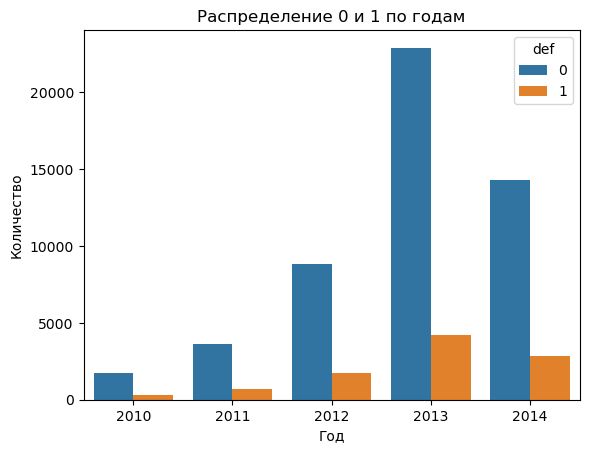

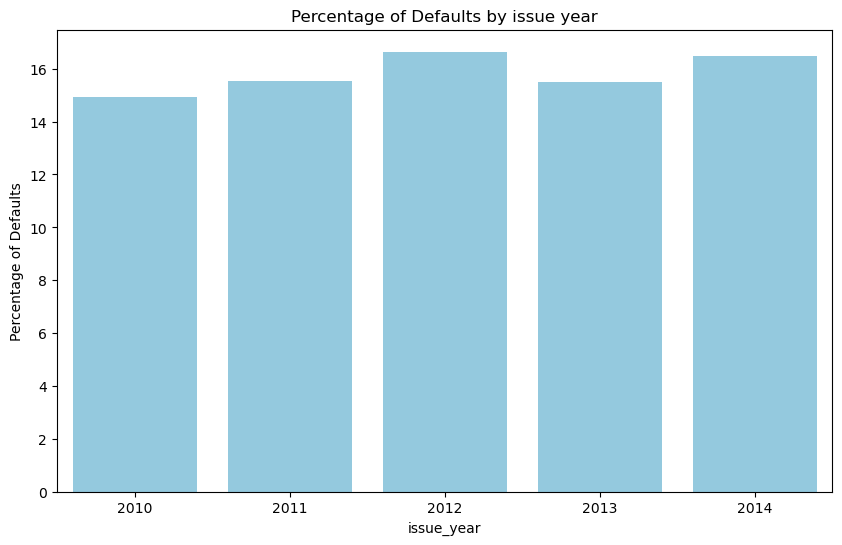

In [380]:
grouped_data = df_train.groupby(['issue_year', 'def']).size().reset_index(name='count')
sns.barplot(data=grouped_data, x='issue_year', y='count', hue='def')
plt.title('Распределение 0 и 1 по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='def')  


plt.show()
count_total = df_train.groupby(['issue_year']).size().reset_index(name='count')
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['issue_year']).size().reset_index(name='count')

merged_counts = pd.merge(count_total, count_1, on='issue_year', suffixes=('_total', '_1'))
merged_counts['percentage'] = (merged_counts['count_1'] / merged_counts['count_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='issue_year', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('issue_year')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by issue year')


plt.show()


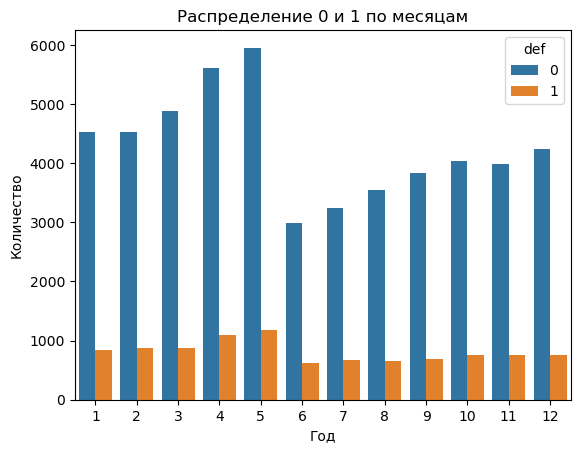

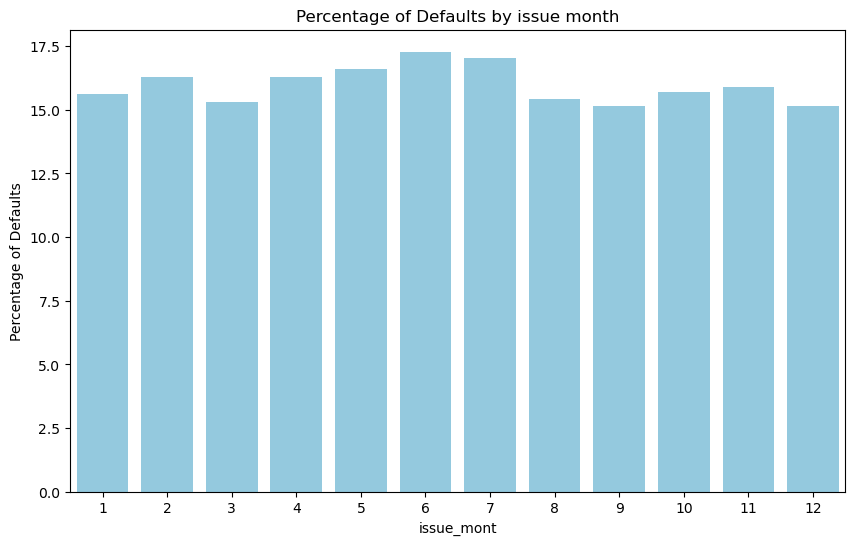

In [381]:
grouped_data = df_train.groupby(['issue_mont', 'def']).size().reset_index(name='count')
sns.barplot(data=grouped_data, x='issue_mont', y='count', hue='def')
plt.title('Распределение 0 и 1 по месяцам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='def')  


plt.show()
count_total = df_train.groupby(['issue_mont']).size().reset_index(name='count')
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['issue_mont']).size().reset_index(name='count')

merged_counts = pd.merge(count_total, count_1, on='issue_mont', suffixes=('_total', '_1'))
merged_counts['percentage'] = (merged_counts['count_1'] / merged_counts['count_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='issue_mont', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('issue_mont')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by issue month')


plt.show()

Как мы видим, дефолт рейт особо не меняется по месяцам и годам, значит эти два признака не будут слишком информативными. В целом это объяснимо: просто дата выдачи кредита не может сильно влиять на заемщика. Для нас было бы полезным, если бы в датасете присутствовала, например, дата последнего платежа и дата ориентировочного закрытия кредита, а просто дата обращения в банк не может стать полезной информацией для модели: банку точно не стоит принимать решение исходя из того, в какое время года клиент обратился за займом.
Однако, можно было предположить, что количество дефолтов может объяснятся через макроэкономические события отдельного года, но в нашем датасете нет, например, даннных о 2008 годе, когда имел место мировой экономический кризис, а представлены лишь данные об относительно спокойном периоде с 2010 по 2014 год.

In [382]:
df_train.drop(columns=['issue_year'], inplace = True)
df_train.drop(columns=['issue_mont'], inplace = True)


## SUB_GRADE

Sub-grade - кредитный рейтинг, присвоенный компанией Lending Club по своим внутренним правилам. Попробуем оценить ее ожидаемую информативность

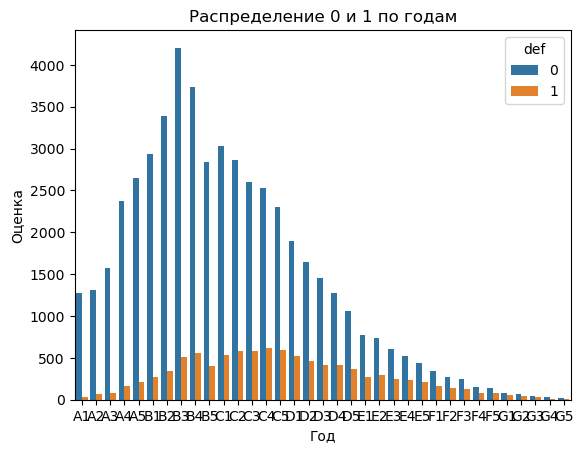

In [383]:
grouped_data = df_train.groupby(['sub_grade', 'def']).size().reset_index(name='count')
sns.barplot(data=grouped_data, x='sub_grade', y='count', hue='def', )
plt.title('Распределение 0 и 1 по годам')
plt.xlabel('Год')
plt.ylabel('Оценка')
plt.legend(title='def')  


plt.show()


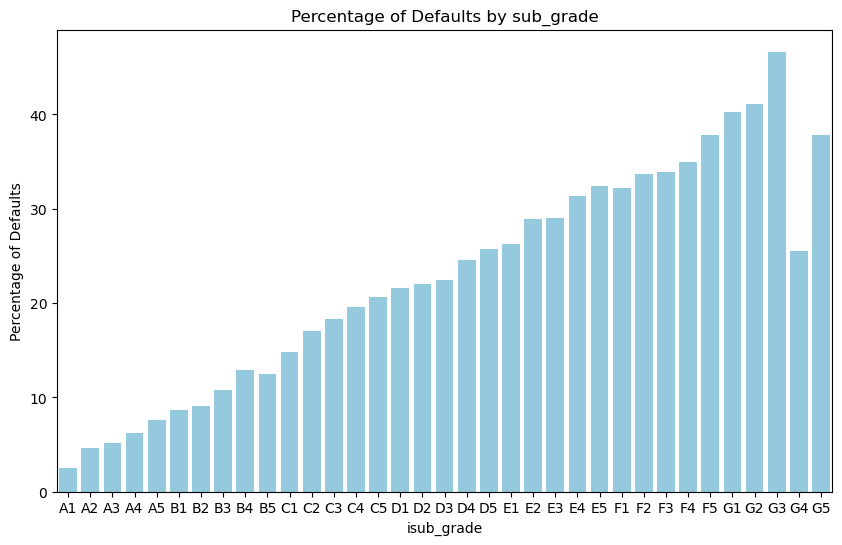

In [384]:
count_total = df_train.groupby(['sub_grade']).size().reset_index(name='count')
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['sub_grade']).size().reset_index(name='count')

merged_counts = pd.merge(count_total, count_1, on='sub_grade', suffixes=('_total', '_1'))
merged_counts['percentage'] = (merged_counts['count_1'] / merged_counts['count_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='sub_grade', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('isub_grade')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by sub_grade')


plt.show()

Несложно заметить, что эта переменная крайне информативна для обучения модели, так как по статистике кредиты оцененные буквами E, F, G, более вероятно окажутся дефолтными.

Посмотрим на распределения категориальных и непрерывных переменных отдельно:

In [385]:
categorical = []
continuous = []
for i in df_train.columns:
    if ((df_train[i].dtype == int) or (df_train[i].dtype == float)):
        continuous.append(i)
    else:
        categorical.append(i)

In [386]:
updatemenu = [dict()]
buttons = []
fig_cat= go.Figure()
data = []  

for i in categorical[1:]:
    trace = px.histogram(df_train[i]).data[0]
    trace.visible = False
    data.append(trace) 

fig_cat.add_traces(data) 
for i, col in enumerate(categorical[1:]):
    visibles = [False] * len(categorical[1:])
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=[{"visible": visibles}]
                        ))

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

fig_cat.update_layout(showlegend=True, updatemenus=updatemenu)
fig_cat.update_layout(
    title={
        "text": "Distribution of categorical variables",
        "x": 0.5
    },
    xaxis_title="Value",
    yaxis_title="Number of values"
)
fig_cat.show()

На основе гистограмм с распределениями можем сделать вывод о некоторых категориальных переменных и рассмотрим их отдельно:

In [387]:
print("Количество уникальных значений в столбце 'emp_title':",df_train['emp_title'].nunique())


Количество уникальных значений в столбце 'emp_title': 38576


Как можно заметить, в столбце 'emp_title' достаточно много уникальных значений и эта переменная является категориальной. Кажется, что нет особого смысла кодировать каждую профессию отдельным числом, так как их достаточно много. На следующем ниже графике видно, что самое большое количество появления одной той же професси - всего лишь 500, а всего данных около 62 000. 
В целом для нашего анализа не столь важно название профессии, сколько факт того, поделился ли с банком этими данными клиент, а также его стаж работы и доход. Поэтому в перспективе можно рассмотреть вариант удаления переменной с названием профессии.

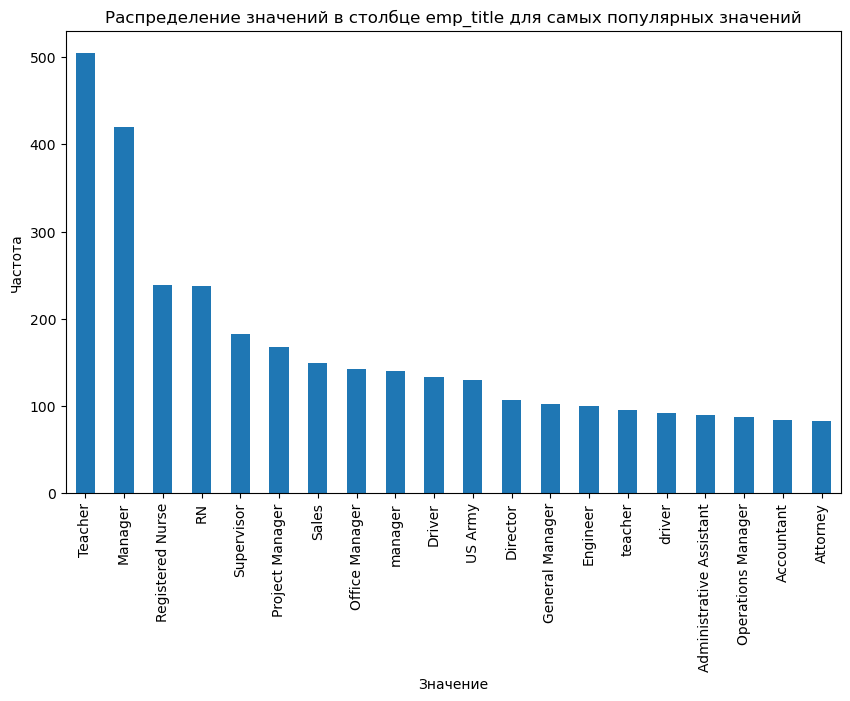

In [388]:

plt.figure(figsize=(10, 6)) 
df_train['emp_title'].value_counts().nlargest(20).plot(kind='bar')  
plt.title('Распределение значений в столбце emp_title для самых популярных значений')  
plt.xlabel('Значение') 
plt.ylabel('Частота') 
plt.show()  



Теперь рассмотрим распределение доли тех, кто "дефолтнул", а кто - нет в зависмости от стажа работы:


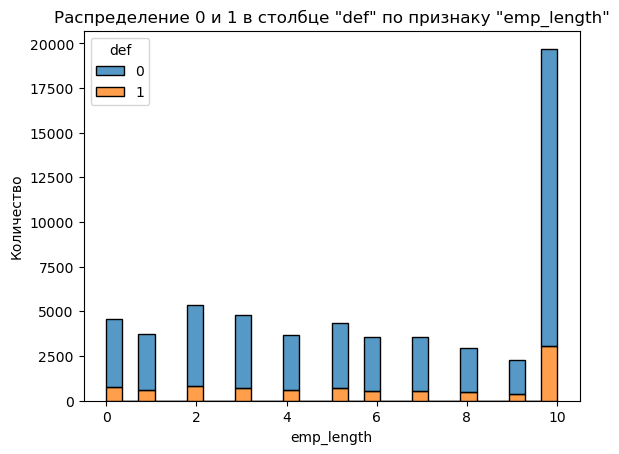

In [389]:

sns.histplot(data=df_train, x='emp_length', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "emp_length"')
plt.xlabel('emp_length')
plt.ylabel('Количество')

plt.show()



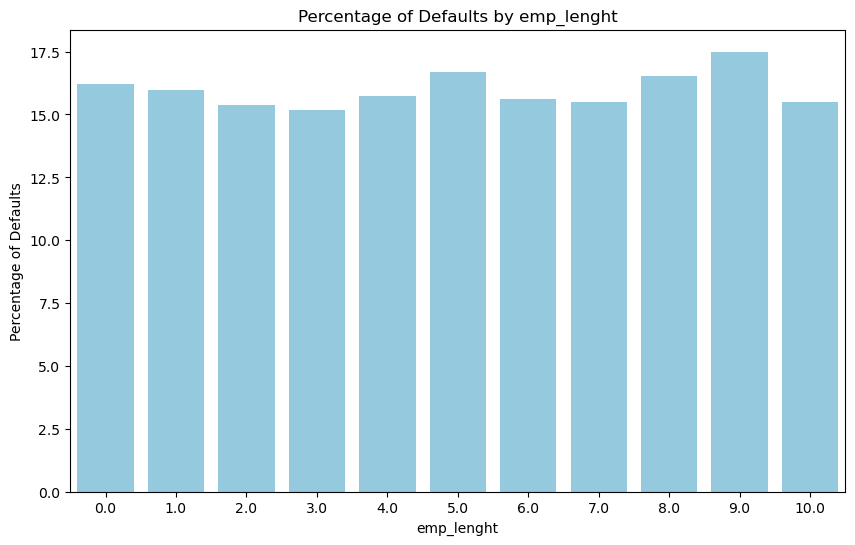

In [390]:
count_total = df_train.groupby(['emp_length']).size().reset_index(name='count')
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['emp_length']).size().reset_index(name='count')

merged_counts = pd.merge(count_total, count_1, on='emp_length', suffixes=('_total', '_1'))
merged_counts['percentage'] = (merged_counts['count_1'] / merged_counts['count_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('emp_lenght')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by emp_lenght')


plt.show()



Парадоксально, но кажется, что на нашей выборке срок стажа на работе не будет сильно информативной, если судить по дефолт-рейту

In [391]:
df_train.drop(columns = ['emp_length'], inplace =True )


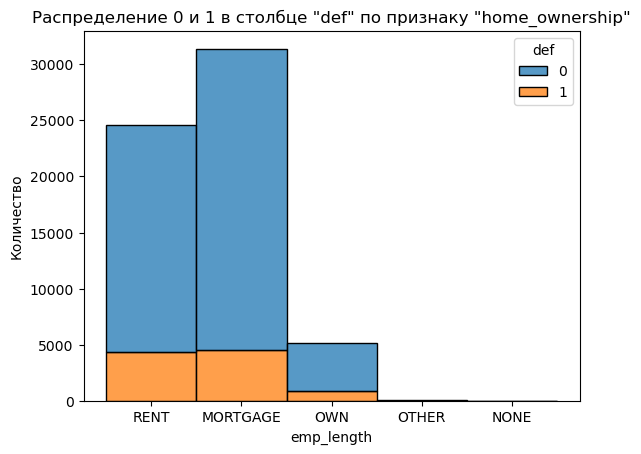

In [392]:
sns.histplot(data=df_train, x='home_ownership', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "home_ownership"')
plt.xlabel('emp_length')
plt.ylabel('Количество')

plt.show()

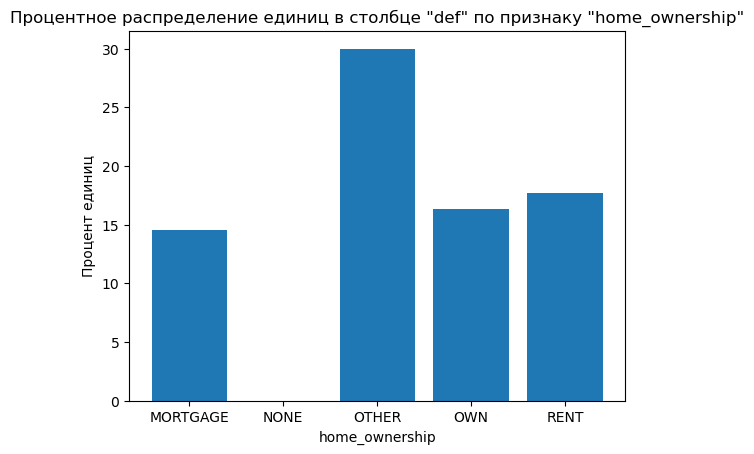

In [393]:
grouped_data = df_train.groupby(['home_ownership', 'def']).size().unstack()


total_counts = grouped_data.sum(axis=1)
percentage_1 = (grouped_data[1] / total_counts) * 100


plt.bar(percentage_1.index, percentage_1.values)


plt.title('Процентное распределение единиц в столбце "def" по признаку "home_ownership"')
plt.xlabel('home_ownership')
plt.ylabel('Процент единиц')

plt.show()

В распределении переменной "Home_ownership" можем заметить две категории, которые в целом можно объединить по смыслу:


In [394]:
df_train['home_ownership'] = df_train['home_ownership'].replace(['OTHER', 'NONE'], 'OTHER')


## DATA PREPROCESSING ##

В нашем датасете всего 22 переменных, поэтому есть смысл оценить важность каждой из них для нашего анализа через EDA.
Посмотрим, в каких категориях есть пропуски до заполнения

In [395]:

missing_values_before = df_train.isna().sum()
print("Пропуски до заполнения:")
print(missing_values_before)



Пропуски до заполнения:
purpose                         0
addr_state                      0
sub_grade                       0
home_ownership                  0
emp_title                    3865
dti                             0
funded_amnt                     0
annual_inc                      0
inq_last_6mths                  0
mths_since_recent_inq       13529
delinq_2yrs                     0
chargeoff_within_12_mths        0
num_accts_ever_120_pd       11941
acc_open_past_24mths         7886
avg_cur_bal                 11945
tot_hi_cred_lim             11941
delinq_amnt                     0
def                             0
dtype: int64


Заметим, что достаточное количество пропусков содержатся в столбцах "emp_title" и "emp_lenght". Можно предположить, что эти данные о своем трудоустройстве клиенты скрыли намеренно: поэтому нельзя однозначно исключить эти переменные, так как пропуск в данных может свидетельствовать об отсутствии работы или ее непостоянности, что может сильно повлиять на решение по выдаче кредита.
Теперь необходимо принять решение, как заполнить данные пропуски:

Как мы ранеее установили, имеет смысл  удалить перемеенную "emp_title", так как такое большое количество уникальных значений не позволяет как-то закодировать эту переменную или создать dummies, но создадим вспомогательный столбец в котором установим значение 1, если имел место пропуск в "emp_title", и 0 в обратном случае.

Можно предположить, что пропуски в столбце 'mths_since_recent_inq' означают, что люди вообще не делали запрос на займ.Поэтому эти пропуски заполним максимальным  значением в столбце, так как, как мы установили в EDA, почему при нулевом inq_last_6mnths такие высокие значения mths_since_recent_inq - просто в последние 6 месяцев запроса от клиента не было, поэтому месяцев с последнего запроса намного больше 6. В целом, как мы установили максимальное значение в столбце - около 24 месяцев, что кажется, является достаточным сроком для повторного запроса на кредит от среднего клиента.


с остальными переменными поступим так: num_accts_ever_120_pd , avg_cur_bal ,tot_hi_cred_lim  заполним средним значением столбцов, которые являются вторым по показателю корреляции для каждого из них, чтобы не создавать еще большую зависимость для переменной с максимальной корреляцией


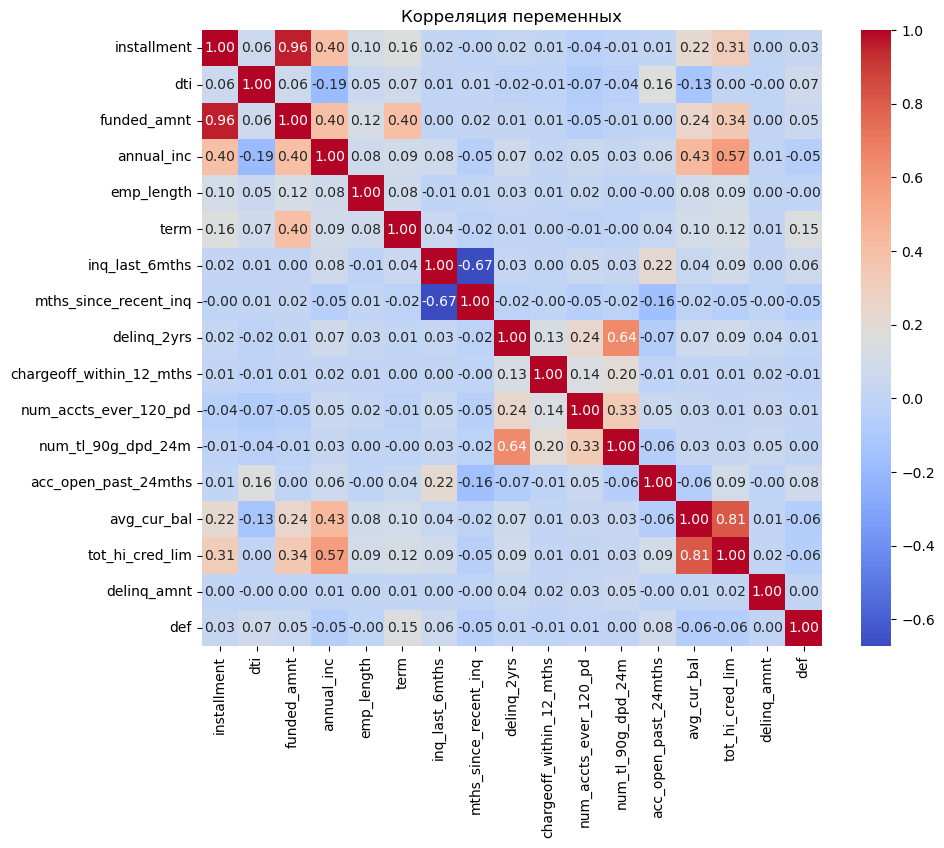

In [396]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Корреляция переменных')  
plt.show() 

In [397]:
# Заполняем пропуски
df_train['emp_title_filled'] = np.where(df_train['emp_title'].isna(), 1, 0)
df_train.drop(columns = ['emp_title'], inplace=True)


In [398]:
df_train['num_accts_ever_120_pd'].fillna(df_train['delinq_2yrs'].mean(), inplace=True)
df_train['avg_cur_bal'].fillna(df_train['annual_inc'].mean(), inplace=True)
df_train['tot_hi_cred_lim'].fillna(df_train['annual_inc'].mean(), inplace=True)
df_train['acc_open_past_24mths_nan'] = np.where(df_train['acc_open_past_24mths'].isna(), 1, 0)
df_train['acc_open_past_24mths'].fillna(0, inplace = True)
df_train['mths_since_recent_inq_nan'] = np.where(df_train['mths_since_recent_inq'].isna(), 1, 0)
df_train['mths_since_recent_inq'].fillna(df_train['mths_since_recent_inq'].max(), inplace = True)



In [399]:
# Посмотрим, в каких категориях остались пропуски после заполнения
missing_values_after = df_train.isna().sum()
print("Пропуски после заполнения:")
print(missing_values_after)

Пропуски после заполнения:
purpose                      0
addr_state                   0
sub_grade                    0
home_ownership               0
dti                          0
funded_amnt                  0
annual_inc                   0
inq_last_6mths               0
mths_since_recent_inq        0
delinq_2yrs                  0
chargeoff_within_12_mths     0
num_accts_ever_120_pd        0
acc_open_past_24mths         0
avg_cur_bal                  0
tot_hi_cred_lim              0
delinq_amnt                  0
def                          0
emp_title_filled             0
acc_open_past_24mths_nan     0
mths_since_recent_inq_nan    0
dtype: int64


In [400]:
df_train.head()

purpose addr_state sub_grade home_ownership    dti  funded_amnt  \
0  debt_consolidation         IL        C3           RENT  16.39         5000   
1  debt_consolidation         FL        B4       MORTGAGE  16.31        20000   
2  debt_consolidation         NJ        B5           RENT  14.01        24000   
3  debt_consolidation         MI        C2       MORTGAGE  14.51        10000   
4         credit_card         TX        D2       MORTGAGE  22.65        13000   

   annual_inc  inq_last_6mths  mths_since_recent_inq  delinq_2yrs  \
0     21600.0               3                   24.0            0   
1     95000.0               1                    4.0            0   
2     90000.0               0                   19.0            0   
3     43000.0               1                    5.0            1   
4     62000.0               3                    5.0            0   

   chargeoff_within_12_mths  num_accts_ever_120_pd  acc_open_past_24mths  \
0                         0               0.259069                   0.0   
1                         0               0.000000                   4.0   
2                         0               0.000000                   5.0   
3                         1               4.000000                   3.0   
4                         0               0.000000                   5.0   

    avg_cur_bal  tot_hi_cred_lim  delinq_amnt  def  emp_title_filled  \
0  72717.547061     72717.547061            0    0                 0   
1  23735.000000    153379.000000            0    0                 0   
2   4070.000000     50834.000000            0    0                 0   
3   1127.000000     32683.000000            0    0                 0   
4   3443.000000     59495.000000            0    0                 0   

   acc_open_past_24mths_nan  mths_since_recent_inq_nan  
0                         1                          1  
1                         0                          0  
2                         0                          0  
3                         0                          0  
4                         0                          0

# Теперь попробуем сгенерировать некоторые новые признаки

Попробуем вернуться к зависимости между годовым доходом и месячным платежом, который полагается заемщику в случае выдачи займа. В новый признак запишем процент, который будет занимать месячный платеж от среднего месячного дохода 

In [401]:
df_train['tot_hi_cred_lim'] = df_train.apply(
        lambda row: row['annual_inc'] if row['tot_hi_cred_lim'] == 0 else row['tot_hi_cred_lim'],
        axis=1
    )

In [402]:
df_train['CUR'] = df_train['funded_amnt']/df_train['tot_hi_cred_lim']


In [403]:
df_train['tot_hi_cred_lim'].min()

500.0

Для дальнейших целей сохраню копию датасета до woe- преобразований

In [404]:
df_train_woe = df_train.copy()


Так же сгенерируем новые признаки на основе категориальных перменных:
нам неудобно работать с переменными, которые представлены строками, так как количество уникальных значений в таких столбцах слишком большое и нам необходимо укрупнить категории.
Начнем со столбца 'adrr_state',  заменим названия штатов на название целого региона США:


In [405]:
df_train_woe['addr_state'].unique()

array(['IL', 'FL', 'NJ', 'MI', 'TX', 'NY', 'CA', 'CO', 'MD', 'LA', 'PA',
       'TN', 'OH', 'DC', 'SC', 'NC', 'VA', 'NV', 'WA', 'MA', 'UT', 'AZ',
       'KY', 'AL', 'IN', 'MO', 'CT', 'GA', 'OR', 'OK', 'MT', 'RI', 'NM',
       'NH', 'MN', 'DE', 'WI', 'KS', 'WV', 'VT', 'AR', 'SD', 'HI', 'AK',
       'WY', 'MS', 'IA'], dtype=object)

In [406]:
addr_encoding = {}
addr_encoding['WEST']=['WA', 'OR', 'CA', 'NV', 'UT', 'CO','WY', 'MT', 'ID', 'HI', 'AK']
addr_encoding['SOUTHWEST'] = ['AZ', 'NM', 'TX', 'OK']
addr_encoding["SOUTHEAST"] = ["AR", 'LA', 'MS', 'AL', 'GA', 'FL', 'SC', 'NC', 'VA', 'DC', "WV", 'KY', "TN"]
addr_encoding["NORTHEAST"] = ['PA', 'DE', 'MD', 'NJ', 'CT', 'RI', 'MA', 'NH', 'ME', 'VT', 'NY']
addr_encoding['MIDWEST']  = ['ND', 'SD', 'NE', 'KS', 'MQ', 'IL', 'IN', 'OH', 'MI', 'WI', 'MN', 'IA'] 

In [407]:
def get_region_by_state(state):
    for region, states in addr_encoding.items():
        if state in states:
            return region
    return 'Unknown'


In [408]:
df_train

purpose addr_state sub_grade home_ownership    dti  \
0      debt_consolidation         IL        C3           RENT  16.39   
1      debt_consolidation         FL        B4       MORTGAGE  16.31   
2      debt_consolidation         NJ        B5           RENT  14.01   
3      debt_consolidation         MI        C2       MORTGAGE  14.51   
4             credit_card         TX        D2       MORTGAGE  22.65   
...                   ...        ...       ...            ...    ...   
61164  debt_consolidation         CA        A5           RENT   7.96   
61165  debt_consolidation         TX        A5       MORTGAGE  20.97   
61166  debt_consolidation         FL        D1           RENT  33.65   
61167  debt_consolidation         TX        B5       MORTGAGE  18.48   
61168               other         IL        E3           RENT  22.33   

       funded_amnt  annual_inc  inq_last_6mths  mths_since_recent_inq  \
0             5000     21600.0               3                   24.0   
1            20000     95000.0               1                    4.0   
2            24000     90000.0               0                   19.0   
3            10000     43000.0               1                    5.0   
4            13000     62000.0               3                    5.0   
...            ...         ...             ...                    ...   
61164        18375    133325.0               0                   24.0   
61165        16500     82000.0               2                    1.0   
61166         6800     27000.0               1                    5.0   
61167         3250     58000.0               0                   24.0   
61168         2000     28000.0               1                    6.0   

       delinq_2yrs  ...  num_accts_ever_120_pd  acc_open_past_24mths  \
0                0  ...               0.259069                   0.0   
1                0  ...               0.000000                   4.0   
2                0  ...               0.000000                   5.0   
3                1  ...               4.000000                   3.0   
4                0  ...               0.000000                   5.0   
...            ...  ...                    ...                   ...   
61164            1  ...               1.000000                   1.0   
61165            0  ...               0.000000                   3.0   
61166            0  ...               1.000000                   5.0   
61167            0  ...               0.259069                   0.0   
61168            0  ...               0.000000                   5.0   

        avg_cur_bal  tot_hi_cred_lim  delinq_amnt  def  emp_title_filled  \
0      72717.547061     72717.547061            0    0                 0   
1      23735.000000    153379.000000            0    0                 0   
2       4070.000000     50834.000000            0    0                 0   
3       1127.000000     32683.000000            0    0                 0   
4       3443.000000     59495.000000            0    0                 0   
...             ...              ...          ...  ...               ...   
61164   5278.000000     48557.000000            0    0                 0   
61165  18594.000000    333493.000000            0    0                 0   
61166   2093.000000     36095.000000            0    0                 0   
61167  72717.547061     72717.547061            0    0                 0   
61168   1302.000000     17432.000000            0    0                 0   

       acc_open_past_24mths_nan  mths_since_recent_inq_nan       CUR  
0                             1                          1  0.068759  
1                             0                          0  0.130396  
2                             0                          0  0.472125  
3                             0                          0  0.305969  
4                             0                          0  0.218506  
...                         ...                        ...       ...  
6

In [409]:
df_train_woe['addr_state'] = df_train_woe['addr_state'].apply(get_region_by_state)
df_train['addr_state'] = df_train['addr_state'].apply(get_region_by_state)

In [410]:
def other_fill(purpose):
        if purpose in ['renewable_energy', 'educational']:
            return 'other'
        else:
            return purpose
    

In [411]:
df_train_woe['purpose'] = df_train_woe['purpose'].apply(other_fill)
df_train['purpose'] = df_train['purpose'].apply(other_fill)

# WOE преобразования


In [412]:

bins = sc.woebin(df_train_woe,
    y="def") 


[INFO] creating woe binning ...


In [413]:
bins

{'addr_state':      variable                              bin  count  count_distr   good  \
 0  addr_state                 SOUTHWEST%,%WEST  22313     0.364776  19027   
 1  addr_state                          MIDWEST   9193     0.150289   7722   
 2  addr_state  NORTHEAST%,%SOUTHEAST%,%Unknown  29663     0.484935  24658   
 
     bad   badprob       woe    bin_iv  total_iv  \
 0  3286  0.147268 -0.094911  0.003181  0.005383   
 1  1471  0.160013  0.003146  0.000001  0.005383   
 2  5005  0.168729  0.066613  0.002201  0.005383   
 
                             breaks  is_special_values  
 0                 SOUTHWEST%,%WEST              False  
 1                          MIDWEST              False  
 2  NORTHEAST%,%SOUTHEAST%,%Unknown              False  ,
 'CUR':   variable          bin  count  count_distr   good   bad   badprob       woe  \
 0      CUR  [-inf,0.06)  14443     0.236116  12821  1622  0.112304 -0.406147   
 1      CUR   [0.06,0.1)  11627     0.190080   9900  1727  0.148

{'addr_state': <Figure size 640x480 with 2 Axes>,
 'CUR': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths': <Figure size 640x480 with 2 Axes>,
 'dti': <Figure size 640x480 with 2 Axes>,
 'inq_last_6mths': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths_nan': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq': <Figure size 640x480 with 2 Axes>,
 'home_ownership': <Figure size 640x480 with 2 Axes>,
 'sub_grade': <Figure size 640x480 with 2 Axes>,
 'emp_title_filled': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq_nan': <Figure size 640x480 with 2 Axes>,
 'num_accts_ever_120_pd': <Figure size 640x480 with 2 Axes>,
 'annual_inc': <Figure size 640x480 with 2 Axes>,
 'delinq_amnt': <Figure size 640x480 with 2 Axes>,
 'tot_hi_cred_lim': <Figure size 640x480 with 2 Axes>,
 'chargeoff_within_12_mths': <Figure size 640x480 with 2 Axes>,
 'avg_cur_bal': <Figure size 640x480 with 2 Axes>,
 'purpose': <Figure size 640x480 with 2 Axes>,
 'funded_amnt': <Figur

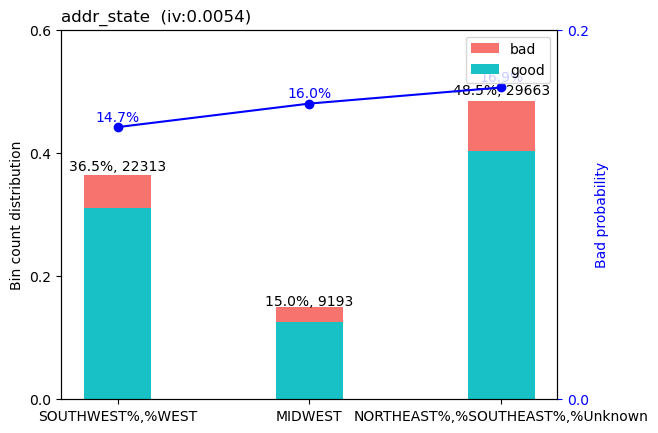

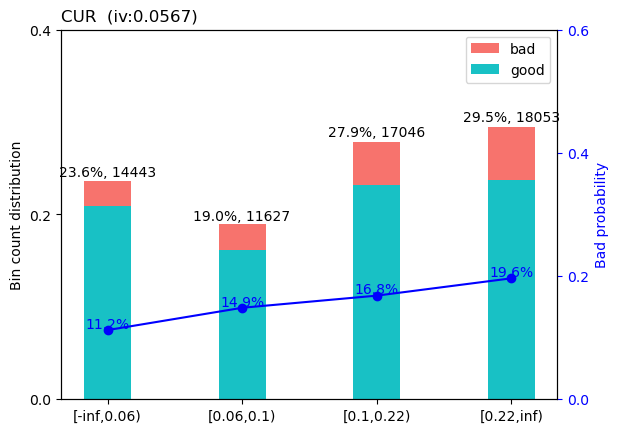

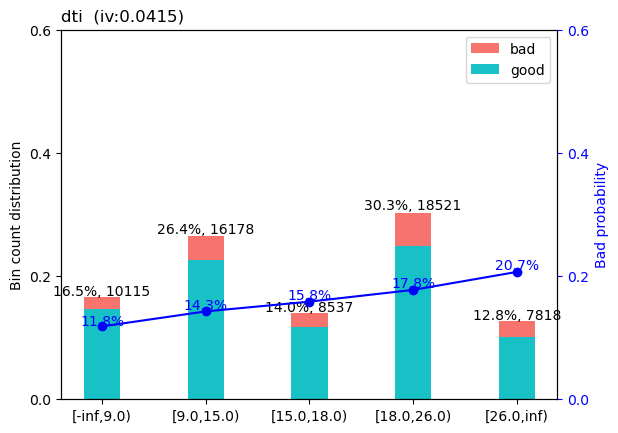

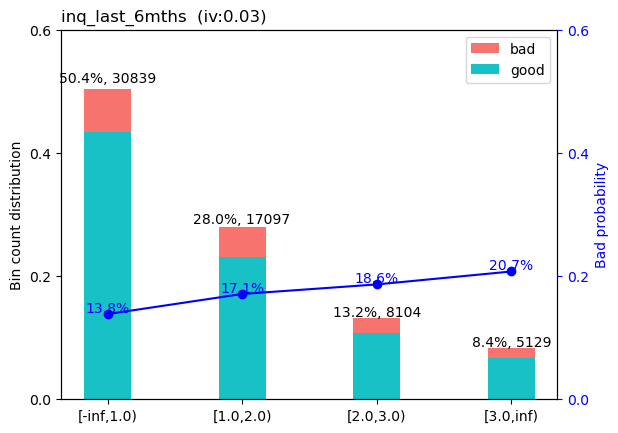

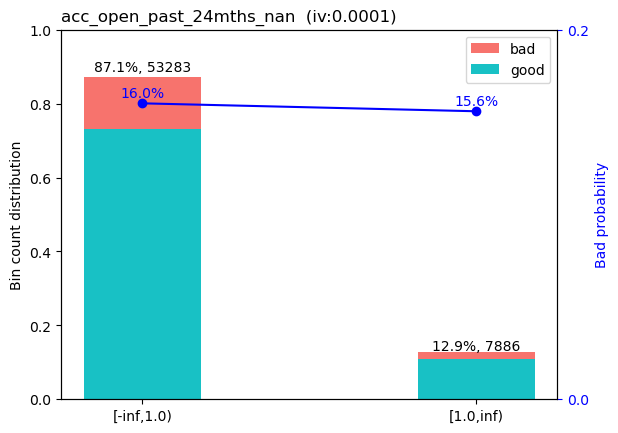

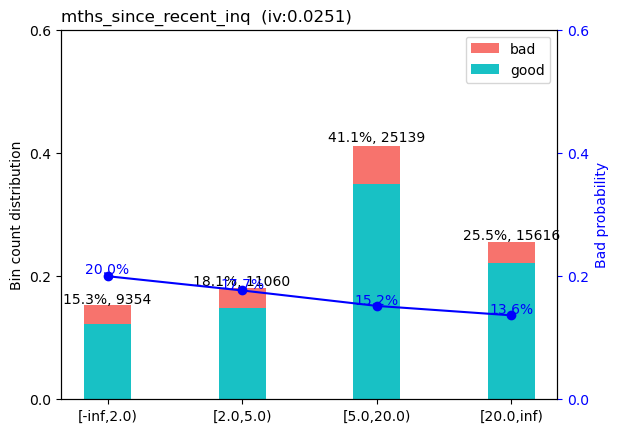

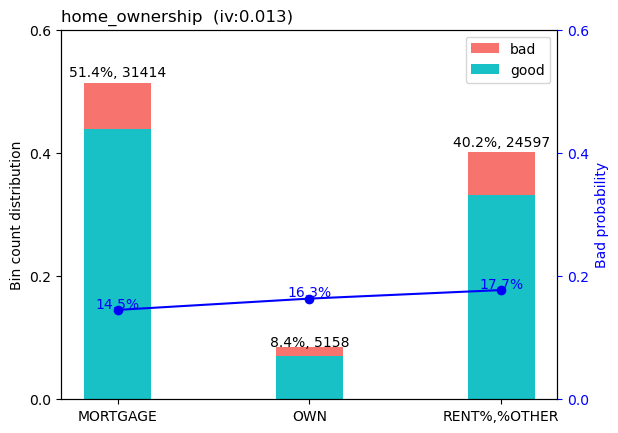

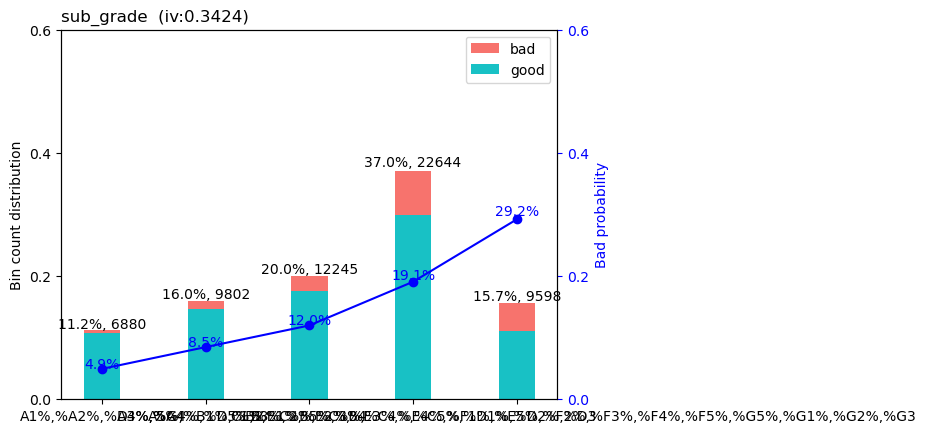

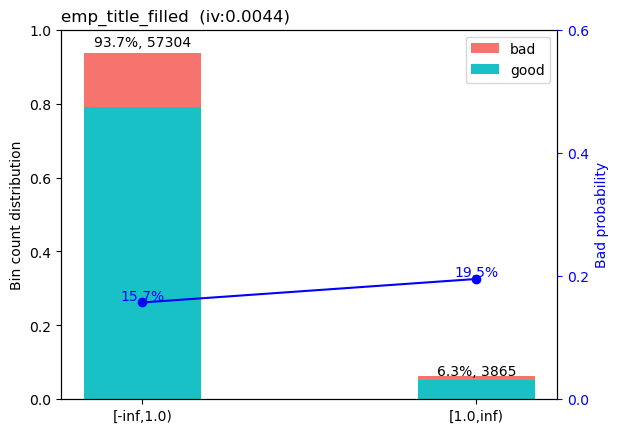

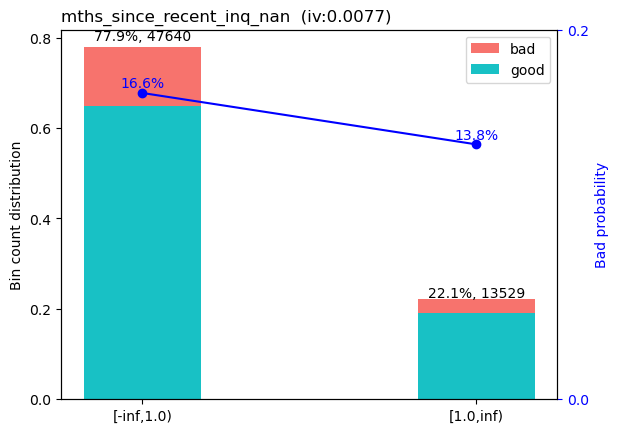

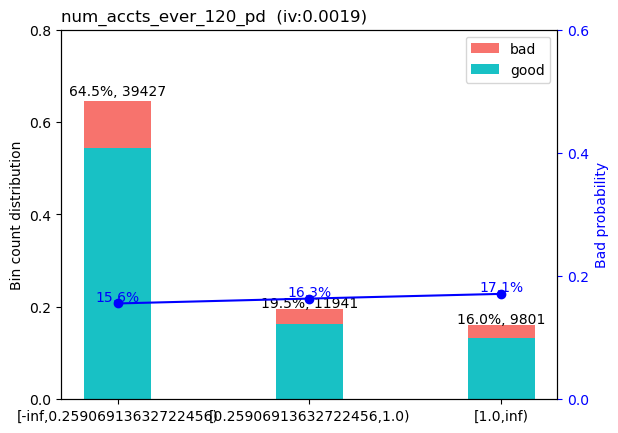

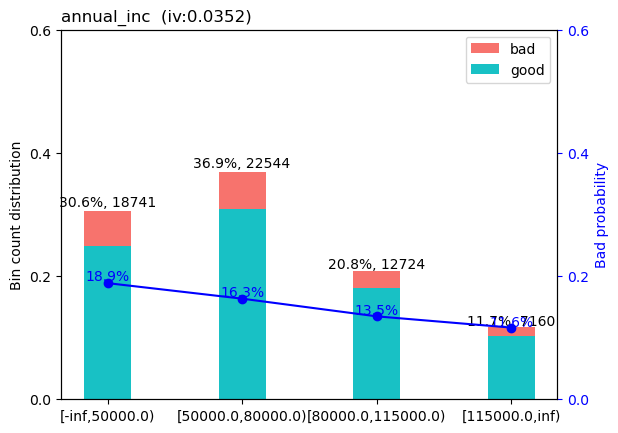

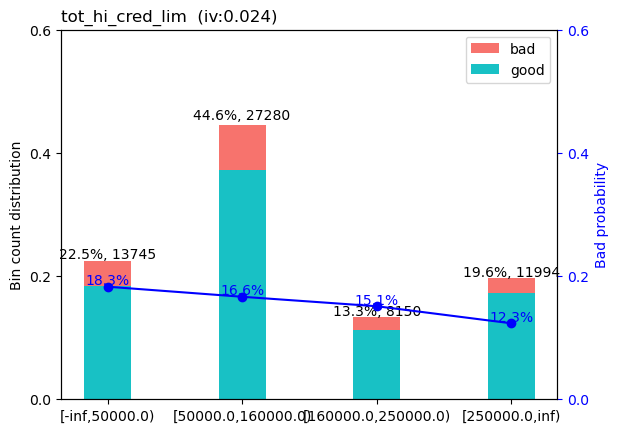

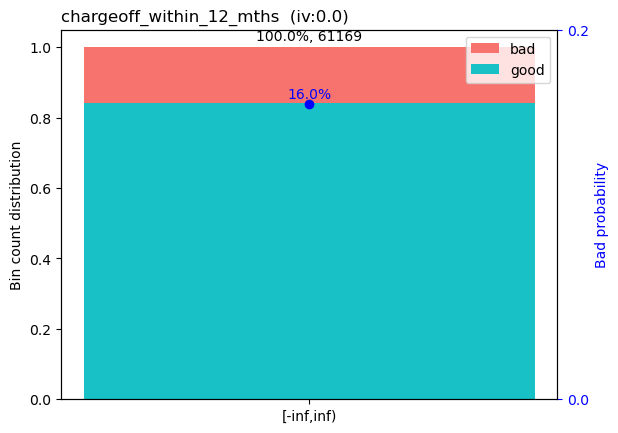

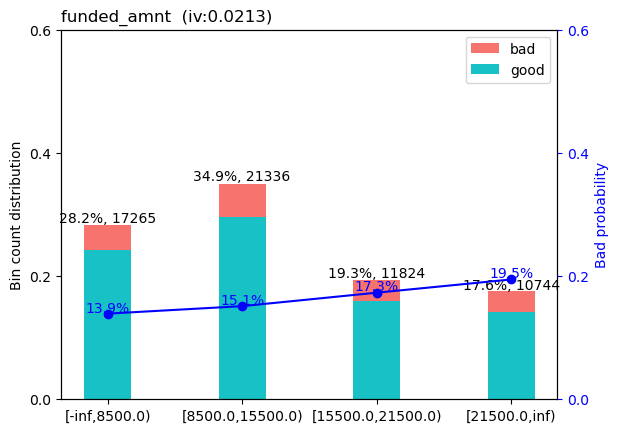

In [414]:
sc.woebin_plot(bins)

Как видно некоторые переменные плохо разделились по бинам или немонотонны, поэтому отдельно разделим их вручную для монотонности

In [415]:
breaks_list = {
    'chargeoff_within_12_mths': [0,0.5],
    'delinq_amnt': [0, 100,500, float('inf')],
    'mths_since_recent_inq' : [5, 15, 20, float('inf') ],
    'delinq_2yrs':[0,0.5,1.5, float('inf')],
    'avg_cur_bal': [0, 15000, 25000, 75000, float('inf')  ]
}


bins_adj = sc.woebin(df_train_woe,
                     breaks_list=breaks_list,
    y="def") 

[INFO] creating woe binning ...


{'addr_state': <Figure size 640x480 with 2 Axes>,
 'CUR': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths': <Figure size 640x480 with 2 Axes>,
 'dti': <Figure size 640x480 with 2 Axes>,
 'inq_last_6mths': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths_nan': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq': <Figure size 640x480 with 2 Axes>,
 'home_ownership': <Figure size 640x480 with 2 Axes>,
 'sub_grade': <Figure size 640x480 with 2 Axes>,
 'emp_title_filled': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq_nan': <Figure size 640x480 with 2 Axes>,
 'num_accts_ever_120_pd': <Figure size 640x480 with 2 Axes>,
 'annual_inc': <Figure size 640x480 with 2 Axes>,
 'delinq_amnt': <Figure size 640x480 with 2 Axes>,
 'tot_hi_cred_lim': <Figure size 640x480 with 2 Axes>,
 'chargeoff_within_12_mths': <Figure size 640x480 with 2 Axes>,
 'avg_cur_bal': <Figure size 640x480 with 2 Axes>,
 'purpose': <Figure size 640x480 with 2 Axes>,
 'funded_amnt': <Figur

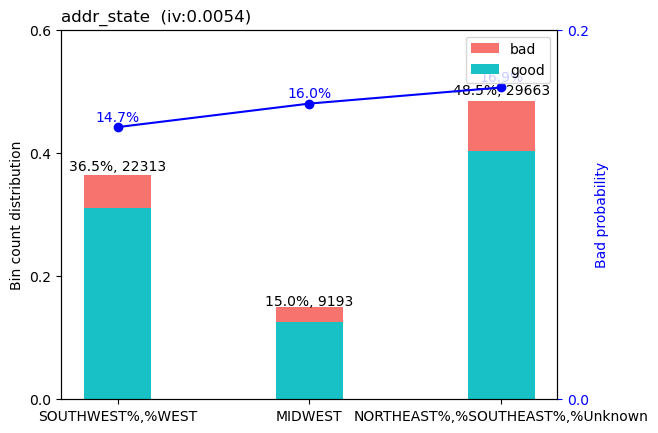

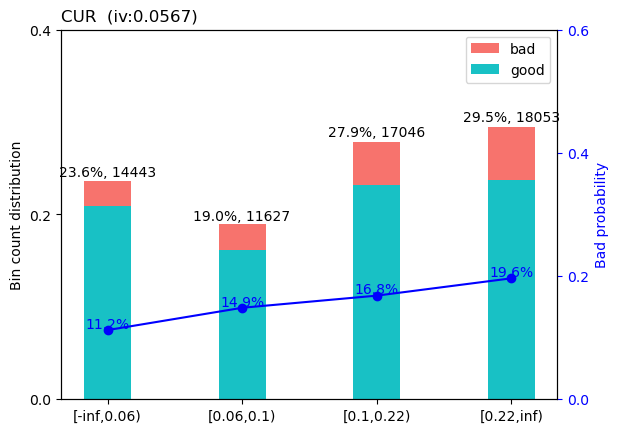

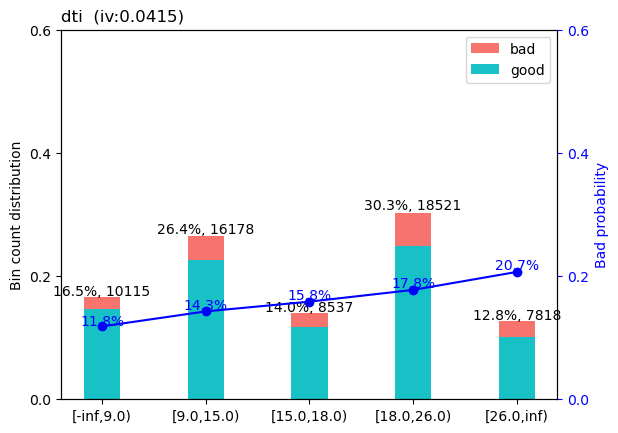

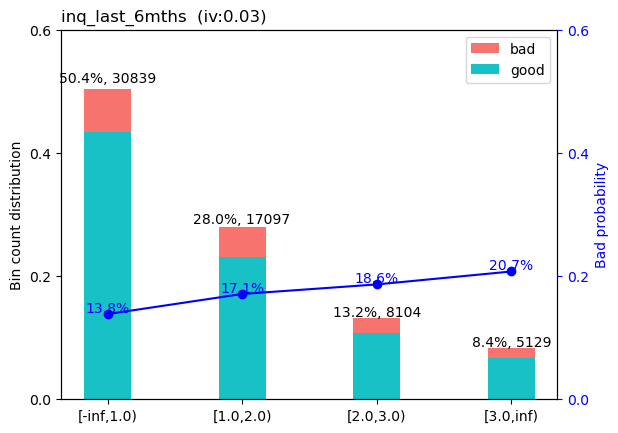

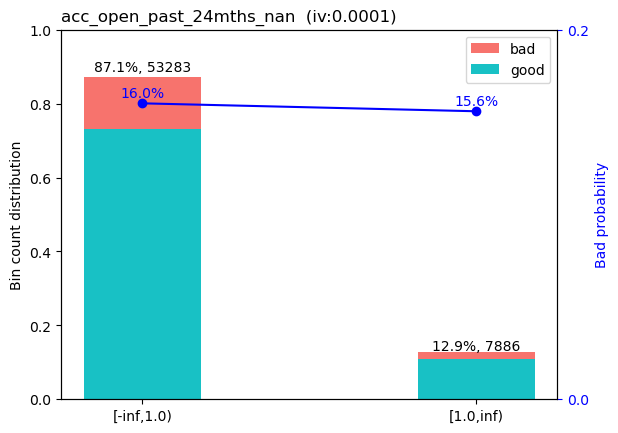

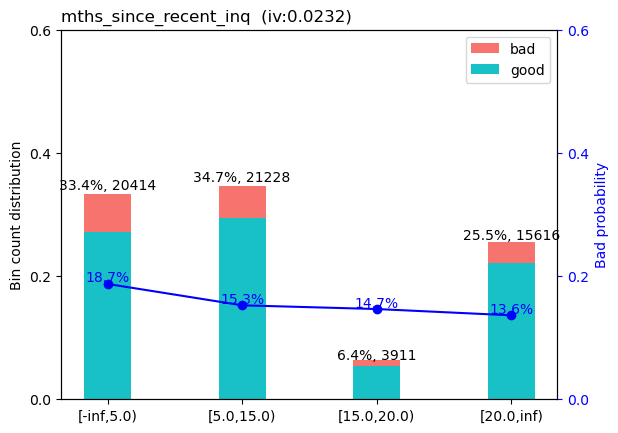

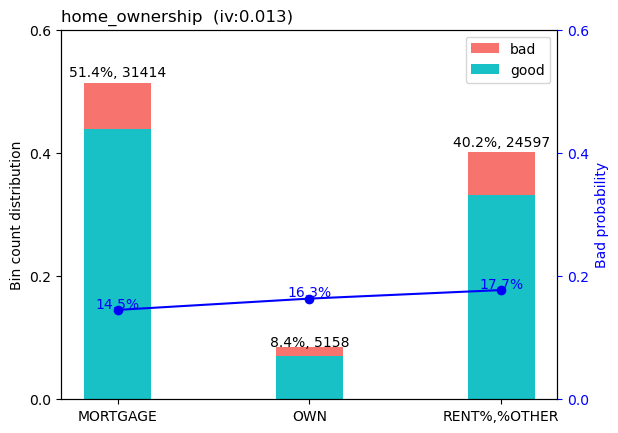

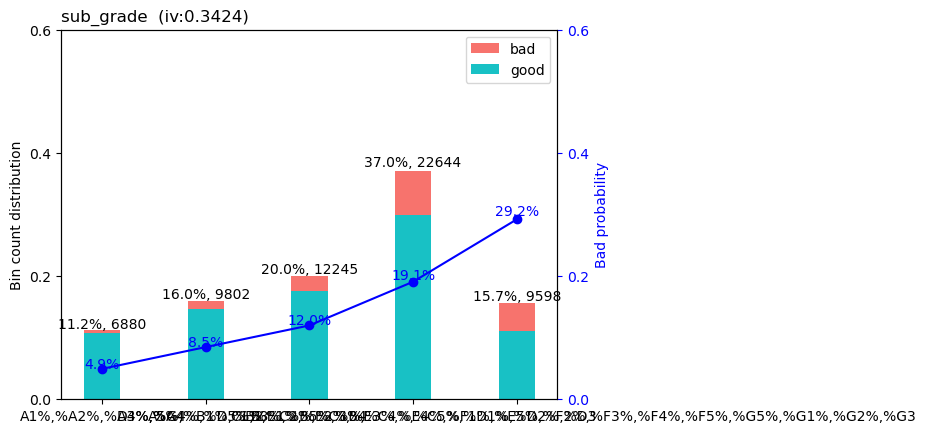

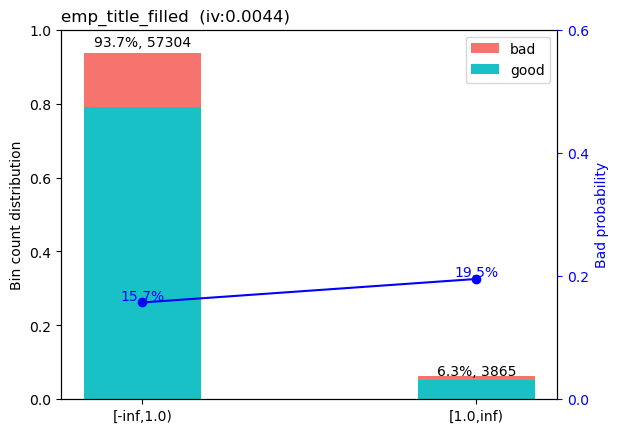

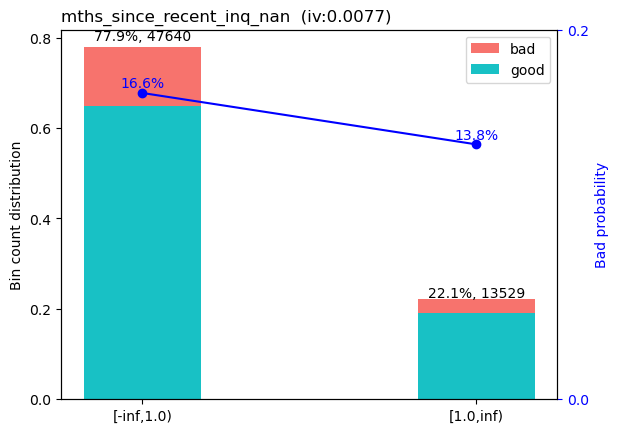

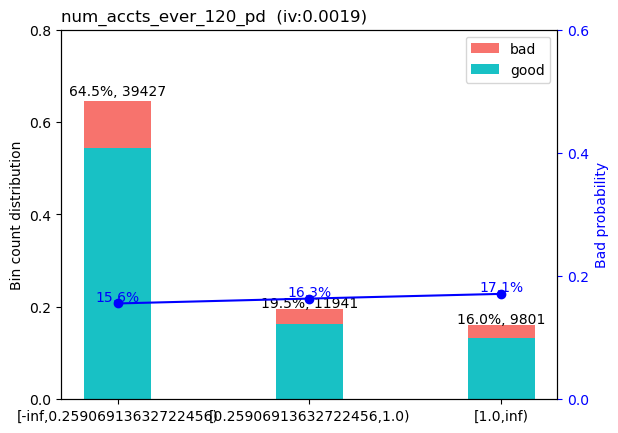

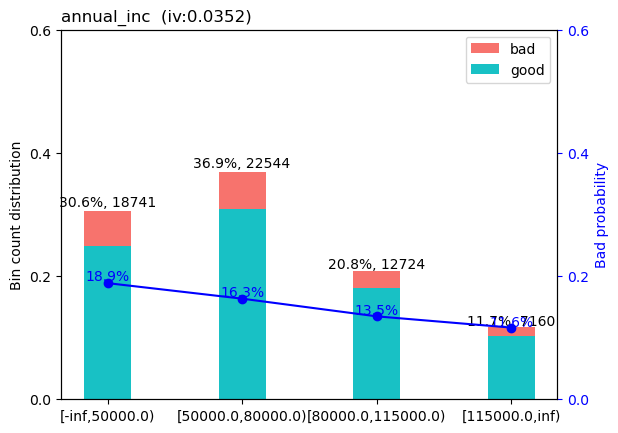

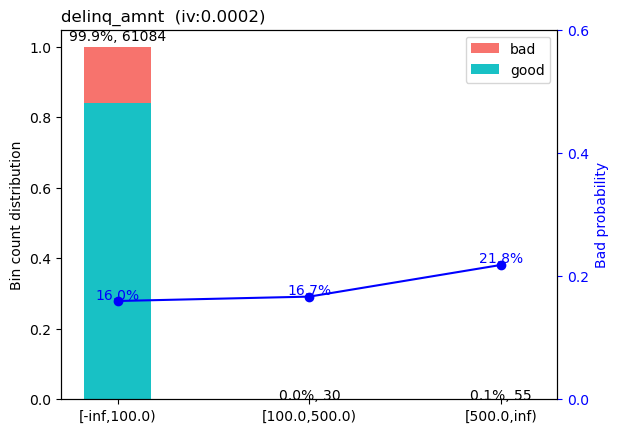

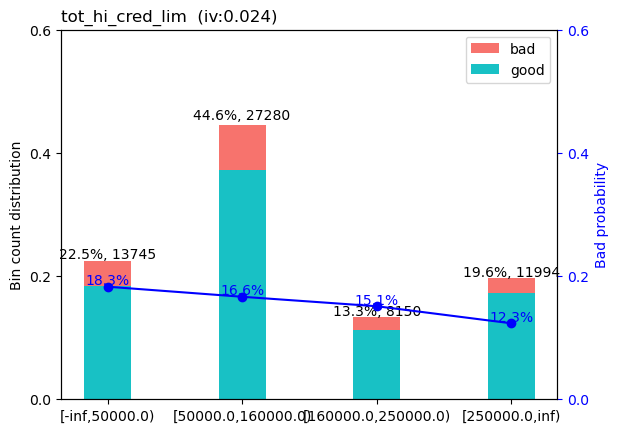

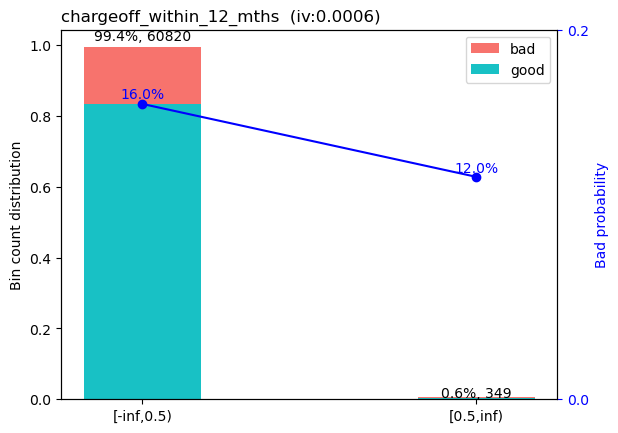

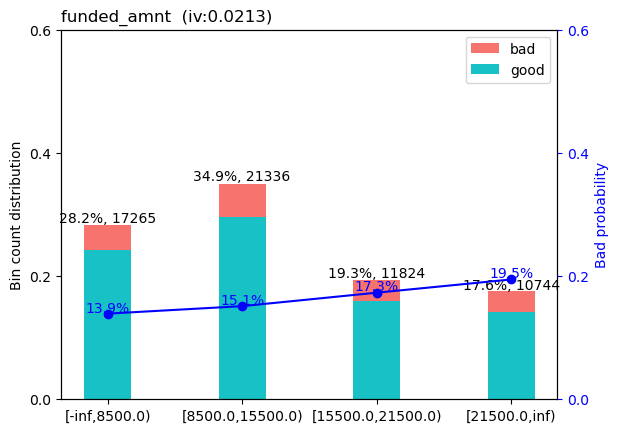

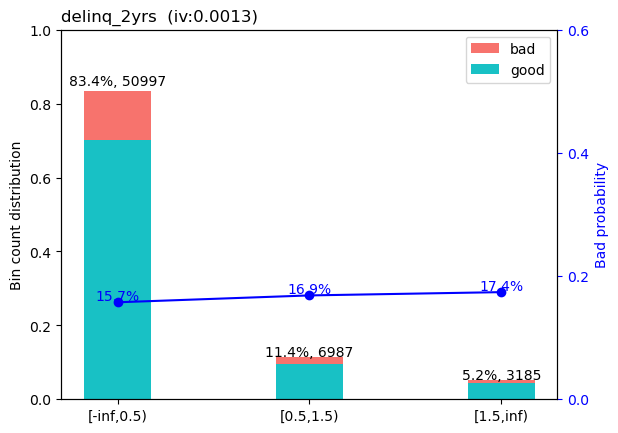

In [416]:
sc.woebin_plot(bins_adj)

In [417]:
total_ivs= {}
for variable_bins in bins:
    total_ivs[variable_bins] = bins[variable_bins]['total_iv'][0]
print(total_ivs)

{'addr_state': 0.005383168985208053, 'CUR': 0.05668011190046949, 'acc_open_past_24mths': 0.03453064773827254, 'dti': 0.04145522105338506, 'inq_last_6mths': 0.02998871914254074, 'acc_open_past_24mths_nan': 0.00011633226384299706, 'mths_since_recent_inq': 0.025085976764350336, 'home_ownership': 0.013020201872118253, 'sub_grade': 0.34237340827945, 'emp_title_filled': 0.004441648670828217, 'mths_since_recent_inq_nan': 0.0077355346068177675, 'num_accts_ever_120_pd': 0.001899976116958305, 'annual_inc': 0.035196389709258355, 'delinq_amnt': 0.0, 'tot_hi_cred_lim': 0.023956893859176757, 'chargeoff_within_12_mths': 0.0, 'avg_cur_bal': 0.025905517392935232, 'purpose': 0.02311048873329757, 'funded_amnt': 0.02130358404011557, 'delinq_2yrs': 0.0012910281703626262}


Отфильтруем наши переменные  по признаку IV, для которого установим порог в 0.01

In [418]:
threshold = 0.025
filtered_dict = {key: value for key, value in total_ivs.items() if value >= threshold}


In [419]:
print('Количество оставшихся признаков:',len(filtered_dict))

Количество оставшихся признаков: 8


In [420]:
filtered_dict

{'CUR': 0.05668011190046949,
 'acc_open_past_24mths': 0.03453064773827254,
 'dti': 0.04145522105338506,
 'inq_last_6mths': 0.02998871914254074,
 'mths_since_recent_inq': 0.025085976764350336,
 'sub_grade': 0.34237340827945,
 'annual_inc': 0.035196389709258355,
 'avg_cur_bal': 0.025905517392935232}

In [421]:
target_train_woe  = df_train_woe['def']

df_train_woe = df_train_woe.drop(['def'], axis=1)
df_train_woe = df_train_woe.filter(items=filtered_dict.keys())
df_train_woe


CUR  acc_open_past_24mths    dti  inq_last_6mths  \
0      0.068759                   0.0  16.39               3   
1      0.130396                   4.0  16.31               1   
2      0.472125                   5.0  14.01               0   
3      0.305969                   3.0  14.51               1   
4      0.218506                   5.0  22.65               3   
...         ...                   ...    ...             ...   
61164  0.378421                   1.0   7.96               0   
61165  0.049476                   3.0  20.97               2   
61166  0.188392                   5.0  33.65               1   
61167  0.044693                   0.0  18.48               0   
61168  0.114732                   5.0  22.33               1   

       mths_since_recent_inq sub_grade  annual_inc   avg_cur_bal  
0                       24.0        C3     21600.0  72717.547061  
1                        4.0        B4     95000.0  23735.000000  
2                       19.0        B5     90000.0   4070.000000  
3                        5.0        C2     43000.0   1127.000000  
4                        5.0        D2     62000.0   3443.000000  
...                      ...       ...         ...           ...  
61164                   24.0        A5    133325.0   5278.000000  
61165                    1.0        A5     82000.0  18594.000000  
61166                    5.0        D1     27000.0   2093.000000  
61167                   24.0        B5     58000.0  72717.547061  
61168                    6.0        E3     28000.0   1302.000000  

[61169 rows x 8 columns]

In [422]:

train_woe = sc.woebin_ply(df_train_woe, bins_adj)

[INFO] converting into woe values ...


In [423]:
train_woe

CUR_woe  acc_open_past_24mths_woe   dti_woe  annual_inc_woe  \
0     -0.084872                 -0.160785 -0.008255        0.201952   
1      0.063201                  0.026698 -0.008255       -0.199372   
2      0.252115                  0.170375 -0.132070       -0.199372   
3      0.252115                 -0.160785 -0.132070        0.201952   
4      0.063201                  0.170375  0.128092        0.027584   
...         ...                       ...       ...             ...   
61164  0.252115                 -0.160785 -0.346976       -0.366271   
61165 -0.406147                 -0.160785  0.128092       -0.199372   
61166  0.063201                  0.170375  0.316359        0.201952   
61167 -0.406147                 -0.160785  0.128092        0.027584   
61168  0.063201                  0.170375  0.128092        0.201952   

       inq_last_6mths_woe  mths_since_recent_inq_woe  avg_cur_bal_woe  \
0                0.320899                  -0.185341        -0.118607   
1                0.082066                   0.193452        -0.111711   
2               -0.168214                  -0.100964         0.100351   
3                0.082066                  -0.053583         0.100351   
4                0.320899                  -0.053583         0.100351   
...                   ...                        ...              ...   
61164           -0.168214                  -0.185341         0.100351   
61165            0.188040                   0.193452        -0.111711   
61166            0.082066                  -0.053583         0.100351   
61167           -0.168214                  -0.185341        -0.118607   
61168            0.082066                  -0.053583         0.100351   

       sub_grade_woe  
0           0.216321  
1          -0.332236  
2          -0.332236  
3           0.216321  
4           0.216321  
...              ...  
61164      -0.717846  
61165      -0.717846  
61166       0.216321  
61167      -0.332236  
61168       0.775780  

[61169 rows x 8 columns]

## Подбор гиперпараметров с помощью кросс- валидации ##

In [424]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

In [425]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
params = {
    'C': np.logspace(-3, 0, 20),
    'penalty': ['l1', 'l2', 'elasticnet'],
}

model = LogisticRegression()

GS_LR = GridSearchCV(cv=cv, estimator=model, param_grid=params, scoring='roc_auc')

GS_LR.fit(train_woe,target_train_woe)

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mo

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

In [426]:
print(GS_LR.best_params_) 
print('Best ROC-AUC {:.3f}'.format(GS_LR.best_score_))

{'C': 1.0, 'penalty': 'l2'}
Best ROC-AUC 0.677


Заметим, что мы получили стандартные гиперпараметры логистической регресси из библиотеки sk-learn. Попробуем поискать гиперпараметры с помощью рандомизированного поиска 

In [427]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'C': np.logspace(-3, 0, 20),
    'penalty': ['l1', 'l2', 'elasticnet'],
}

model = LogisticRegression()

RS_LR = RandomizedSearchCV(estimator=model, param_distributions=params, cv=cv, scoring='roc_auc')


RS_LR.fit(train_woe,target_train_woe)

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ]),
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   scoring='roc_auc')

In [428]:
print(RS_LR.best_params_) 
print('Best ROC-AUC {:.3f}'.format(RS_LR.best_score_))

{'penalty': 'l2', 'C': 0.6951927961775606}
Best ROC-AUC 0.677


In [429]:
RS_LR.best_score_

0.6773323302333882

In [430]:
from sklearn.model_selection import train_test_split
X_train_woe, X_val_woe, y_train_woe, y_val_woe = train_test_split(df_train_woe, target_train_woe, test_size=0.2, random_state=42)

In [431]:
df_train_woe

CUR  acc_open_past_24mths    dti  inq_last_6mths  \
0      0.068759                   0.0  16.39               3   
1      0.130396                   4.0  16.31               1   
2      0.472125                   5.0  14.01               0   
3      0.305969                   3.0  14.51               1   
4      0.218506                   5.0  22.65               3   
...         ...                   ...    ...             ...   
61164  0.378421                   1.0   7.96               0   
61165  0.049476                   3.0  20.97               2   
61166  0.188392                   5.0  33.65               1   
61167  0.044693                   0.0  18.48               0   
61168  0.114732                   5.0  22.33               1   

       mths_since_recent_inq sub_grade  annual_inc   avg_cur_bal  
0                       24.0        C3     21600.0  72717.547061  
1                        4.0        B4     95000.0  23735.000000  
2                       19.0        B5     90000.0   4070.000000  
3                        5.0        C2     43000.0   1127.000000  
4                        5.0        D2     62000.0   3443.000000  
...                      ...       ...         ...           ...  
61164                   24.0        A5    133325.0   5278.000000  
61165                    1.0        A5     82000.0  18594.000000  
61166                    5.0        D1     27000.0   2093.000000  
61167                   24.0        B5     58000.0  72717.547061  
61168                    6.0        E3     28000.0   1302.000000  

[61169 rows x 8 columns]

In [432]:
test_woe = sc.woebin_ply(X_val_woe, bins_adj)
train_woe = sc.woebin_ply(X_train_woe, bins_adj)

[INFO] converting into woe values ...


[INFO] converting into woe values ...


In [433]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import f1_score, classification_report
model_woe =  LogisticRegression(C=RS_LR.best_params_['C'], penalty='l2')
model_woe.fit(train_woe, y_train_woe)
test_pred = model_woe.predict_proba(test_woe)[:,1]
woe_pred= model_woe.predict(test_woe)

In [434]:
test_perf_woe = sc.perf_eva(y_val_woe, test_pred, plot_type = ["roc"], title = "test")
print('Gini coeff test  =' , test_perf_woe['Gini'])

Gini coeff test  = 0.3712


In [435]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import f1_score, classification_report

model_woe=  LogisticRegression(C=GS_LR.best_params_['C'], penalty='l2')
model_woe.fit(train_woe, y_train_woe)
test_pred = model_woe.predict_proba(test_woe)[:,1]
woe_pred= model_woe.predict(test_woe)



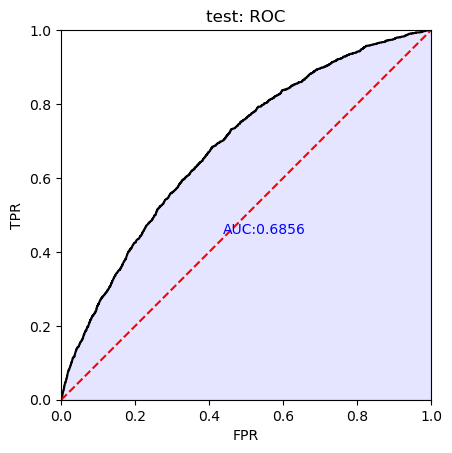

Gini coeff test  = 0.3712


In [436]:
test_perf_woe = sc.perf_eva(y_val_woe, test_pred, plot_type = ["roc"], title = "test")
gini_coef_test = test_perf_woe['Gini']
print('Gini coeff test  =' , test_perf_woe['Gini'])

Сделаем выводы по поводу значений коэффициента Джини для нашей модели:
на тестовом дата сете, гиперпараметры, подобранные с помощью рандомизированного поиска, показали лучший результат в терминах коэффициента Джини, поэтому , далее будем использовать в модели именно эти параметры

## Валидационный датасет ##

In [437]:
df_val = pd.read_csv('/Users/amirzoyeva/Desktop/scoring/vl_for_students.csv')


In [438]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60333 entries, 0 to 60332
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   issue_d                   60333 non-null  object 
 1   purpose                   60333 non-null  object 
 2   addr_state                60333 non-null  object 
 3   sub_grade                 60333 non-null  object 
 4   home_ownership            60333 non-null  object 
 5   emp_title                 57187 non-null  object 
 6   installment               60333 non-null  float64
 7   dti                       60333 non-null  float64
 8   funded_amnt               60333 non-null  int64  
 9   annual_inc                60333 non-null  float64
 10  emp_length                57198 non-null  float64
 11  term                      60333 non-null  int64  
 12  inq_last_6mths            60333 non-null  int64  
 13  mths_since_recent_inq     54344 non-null  float64
 14  delinq

In [439]:
df_val.drop(columns=['num_tl_90g_dpd_24m'], inplace = True)
df_val['home_ownership'] = df_val['home_ownership'].replace(['OTHER', 'NONE'], 'OTHER')
df_val.drop(columns = ['emp_length'], inplace =True )
df_val['emp_title_filled'] = np.where(df_val['emp_title'].isna(), 1, 0)
df_val.drop(columns = ['emp_title'], inplace=True)
df_val['mths_since_recent_inq_nan'] = np.where(df_val['mths_since_recent_inq'].isna(), 1, 0)
df_val['mths_since_recent_inq'].fillna(df_val['mths_since_recent_inq'].max(), inplace = True)
df_val['perc_month'] = (df_val['installment']/(df_val['annual_inc']/12))*100
df_val_woe = df_val


In [440]:
filtered_dict['issue_d'] = 0

In [441]:
target_val_woe  = df_val_woe['def']
df_val_woe = df_val_woe.drop(['def'], axis=1)
df_val_woe['addr_state'] = df_val_woe['addr_state'].apply(get_region_by_state)
df_val_woe['purpose'] = df_val_woe['purpose'].apply(other_fill)
df_val_woe['CUR'] = df_val_woe['funded_amnt']/df_val_woe['tot_hi_cred_lim']
val_start = df_val_woe.copy()
df_val_woe = df_val_woe.filter(items=filtered_dict.keys())

X_valv_woe = df_val_woe

testv_woe = sc.woebin_ply(X_valv_woe, bins_adj)

testv_woe.drop(columns= ['issue_d'], inplace = True)

testv_pred = model_woe.predict_proba(testv_woe)[:,1]
testv_cat = model_woe.predict(testv_woe)

testv_perf_woe = sc.perf_eva(target_val_woe, testv_pred, plot_type = ["roc"], title = "val")


gini_coef_val = testv_perf_woe['Gini']
print('Gini coeff validation  =' , gini_coef_val)

[INFO] converting into woe values ...


Gini coeff validation  = 0.3681


In [442]:
df_val_woe

CUR  acc_open_past_24mths    dti  inq_last_6mths  \
0      0.024376                     8  17.22               1   
1      0.088388                     2  25.10               0   
2      0.264760                     8  17.97               1   
3      0.146213                     3  15.82               2   
4      0.060708                     2  14.37               0   
...         ...                   ...    ...             ...   
60328  0.006390                    11  14.60               0   
60329  0.498442                     2  13.60               0   
60330  0.035855                     6  18.32               0   
60331  0.049239                     4  17.74               0   
60332  0.146224                     9  18.18               0   

       mths_since_recent_inq sub_grade  annual_inc  avg_cur_bal     issue_d  
0                        0.0        C5    270000.0        47255  2015-04-01  
1                       25.0        D1     84000.0        17604  2014-09-01  
2                        4.0        D3     59028.0         3697  2014-10-01  
3                        2.0        C2     46280.0         5875  2014-07-01  
4                       25.0        B5    150000.0        55056  2015-01-01  
...                      ...       ...         ...          ...         ...  
60328                    3.0        E2     94500.0        18053  2014-10-01  
60329                   12.0        B5    110000.0         4840  2014-07-01  
60330                    6.0        C3     52000.0        23024  2014-09-01  
60331                    0.0        B3     52000.0        22523  2015-04-01  
60332                    1.0        B5    131200.0         6546  2015-01-01  

[60333 rows x 9 columns]

Как мы видим, на валидационном датасете коэффициент Джини упал несильно: его показатель все еще больше 35 %, что является хорошим качеством, так что модель в целом работает на реальных данных.

In [443]:
filtered_dict.pop('issue_d')

0

## Валидационные тесты ##

Тест M2.2: Эффективность ранжирования отдельных факторов

In [444]:
filtered_dict

{'CUR': 0.05668011190046949,
 'acc_open_past_24mths': 0.03453064773827254,
 'dti': 0.04145522105338506,
 'inq_last_6mths': 0.02998871914254074,
 'mths_since_recent_inq': 0.025085976764350336,
 'sub_grade': 0.34237340827945,
 'annual_inc': 0.035196389709258355,
 'avg_cur_bal': 0.025905517392935232}

In [445]:
results = {}
for i in filtered_dict:
    model =  LogisticRegression(random_state=0, penalty='l2', C = 1)
    model.fit(testv_woe[i+'_woe'].values.reshape(-1,1), target_val_woe.values.reshape(-1, 1))
    testv_pred = model.predict_proba(testv_woe[i+'_woe'].values.reshape(-1,1))[:,1]
    testv_perf_woe = sc.perf_eva(target_val_woe, testv_pred, show_plot=False)
    results[i] = testv_perf_woe['Gini']
   

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [446]:
results

{'CUR': 0.1426,
 'acc_open_past_24mths': 0.1506,
 'dti': 0.1452,
 'inq_last_6mths': 0.0903,
 'mths_since_recent_inq': 0.0907,
 'sub_grade': 0.3203,
 'annual_inc': 0.1069,
 'avg_cur_bal': 0.0955}

In [447]:
results_plot = sorted(results.items(), key=lambda item: item[1], reverse=True)

feature_names = [item[0] for item in results_plot]
gini_values = [item[1] for item in results_plot]



In [448]:

plt.figure(figsize=(10, 6))
plt.bar(feature_names, gini_values)
plt.xlabel('Features')
plt.ylabel('Gini Value')
plt.title('Gini Values for Each Feature')
plt.xticks(rotation=45, ha='right')


plt.show()

Тест M2.5: Анализ вкладов факторов в формирование Джини модели

In [449]:
for i in range(len(feature_names)):
    feature_names[i]=feature_names[i]+'_woe'

In [450]:
feature_names

['sub_grade_woe',
 'acc_open_past_24mths_woe',
 'dti_woe',
 'CUR_woe',
 'annual_inc_woe',
 'avg_cur_bal_woe',
 'mths_since_recent_inq_woe',
 'inq_last_6mths_woe']

In [451]:
results2 = {}
prev_gini = 0
i = 1
while i < len(feature_names)+1:
    model =  LogisticRegression(random_state=0, penalty='l2', C = 1)
    if i ==1:
        model.fit(testv_woe[feature_names[:i]].values.reshape(-1,1), target_val_woe.values.reshape(-1, 1))
        testv_pred = model.predict_proba(testv_woe[feature_names[:i]].values.reshape(-1,1))[:,1]
        
    else:
        model.fit(testv_woe[feature_names[:i]], target_val_woe.values.reshape(-1, 1))
        testv_pred = model.predict_proba(testv_woe[feature_names[:i]])[:,1]
    testv_perf_woe = sc.perf_eva(target_val_woe.values, testv_pred, show_plot=False)
    results2[feature_names[i-1]] = testv_perf_woe['Gini']-prev_gini
    prev_gini =  testv_perf_woe['Gini']
    i+=1
    

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [452]:
results2

{'sub_grade_woe': 0.3203,
 'acc_open_past_24mths_woe': 0.0262,
 'dti_woe': 0.008600000000000052,
 'CUR_woe': 0.015599999999999947,
 'annual_inc_woe': 0.0021000000000000463,
 'avg_cur_bal_woe': 9.999999999998899e-05,
 'mths_since_recent_inq_woe': 0.0010000000000000009,
 'inq_last_6mths_woe': 9.999999999998899e-05}

In [453]:
gini_differences = list(results2.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, gini_differences)  # используем bar вместо barh для вертикального графика
plt.xlabel('Features')  # меняем местами оси
plt.ylabel('Change in Gini')
plt.title('Change in Gini for Each Added Feature')
plt.xticks(rotation=45, ha='right')

plt.plot(feature_names, gini_values, color='red', marker='o', linestyle='-')  

plt.gca().invert_yaxis()  

plt.show()


 Тест M5.1: Сравнение эффективности ранжирования модели на разработке и валидации 

In [509]:
gini_coef_val

0.3681

In [510]:
gini_coef_test

0.3712

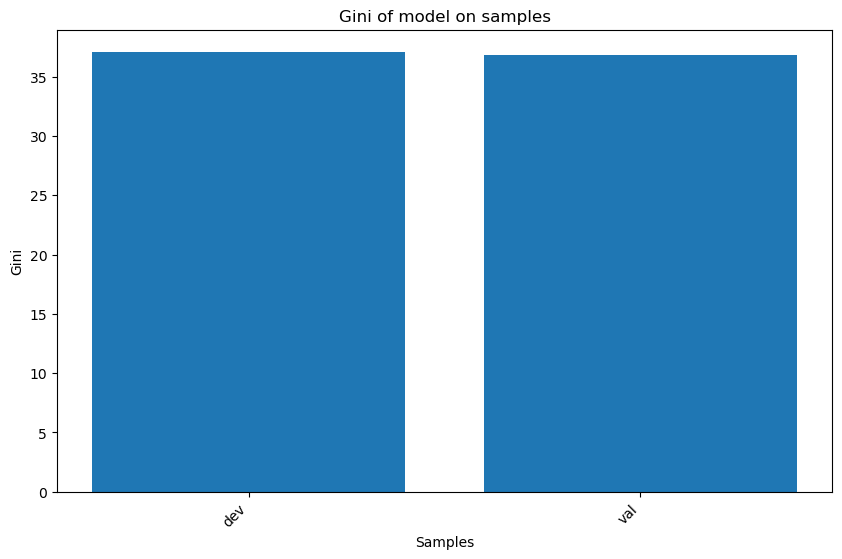

Absolute difference between Gini = -0.3100000000000023
Relative difference between Gini = -0.008351293103448338


In [455]:

gini_coef_absol = (gini_coef_val*100 - gini_coef_test*100)
gini_coef_rel = gini_coef_absol/(gini_coef_test*100)

names = ['dev', 'val']
coefs = [gini_coef_test*100, gini_coef_val*100]
plt.figure(figsize=(10, 6))
bars = plt.bar(names, coefs)
plt.xlabel('Samples')
plt.ylabel('Gini')
plt.title('Gini of model on samples')
plt.xticks(rotation=45, ha='right')
plt.show()
print('Absolute difference between Gini =' ,gini_coef_absol)
print('Relative difference between Gini =' ,gini_coef_rel)


Абсолютное и относительное снижения соответсвуют зеленому индикатору в тесте

Тест M5.2: Сравнение эффективности ранжирования отдельных факторов модели на разработке и валидации

In [456]:
results_dev = {}
for i in filtered_dict:
    model =  LogisticRegression(random_state=0, penalty='l2', C = 1)
    model.fit(train_woe[i+'_woe'].values.reshape(-1,1), y_train_woe.values.reshape(-1, 1))
    test_pred = model.predict_proba(test_woe[i+'_woe'].values.reshape(-1,1))[:,1]
    test_perf_woe = sc.perf_eva(y_val_woe, test_pred, show_plot=False)
    results_dev[i] = test_perf_woe['Gini']

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [457]:
results_dev_plot = sorted(results_dev.items(), key=lambda item: item[1], reverse=True)
gini_values_dev = [item[1] for item in results_dev_plot]

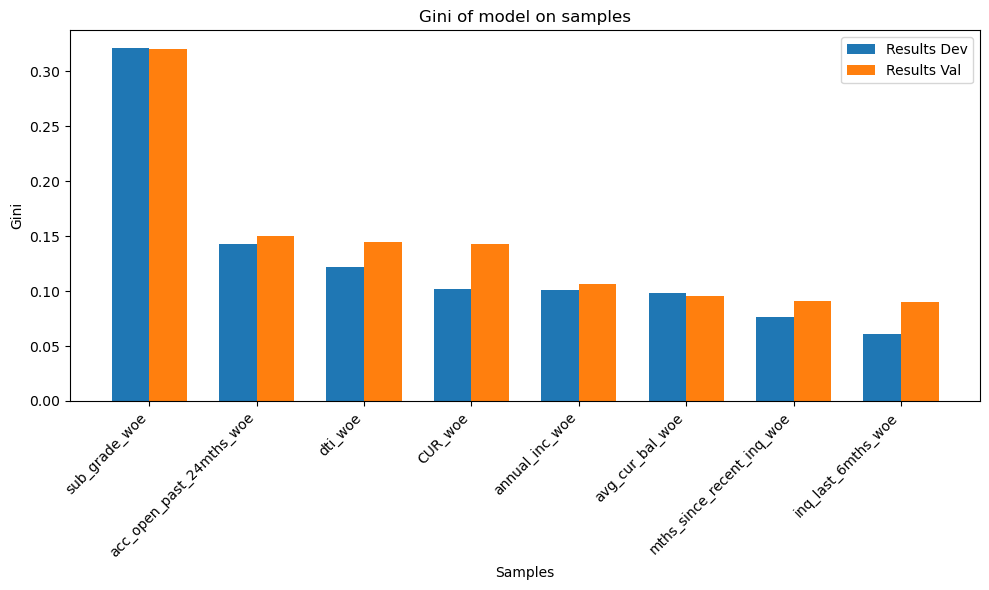

In [458]:

index = range(len(feature_names))
bar_width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(index, gini_values_dev, bar_width, label='Results Dev')

plt.bar([i + bar_width for i in index], gini_values, bar_width, label='Results Val')

plt.xlabel('Samples')
plt.ylabel('Gini')
plt.title('Gini of model on samples')
plt.xticks([i + bar_width/2 for i in index], feature_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [459]:
results

{'CUR': 0.1426,
 'acc_open_past_24mths': 0.1506,
 'dti': 0.1452,
 'inq_last_6mths': 0.0903,
 'mths_since_recent_inq': 0.0907,
 'sub_grade': 0.3203,
 'annual_inc': 0.1069,
 'avg_cur_bal': 0.0955}

In [460]:
absolute_gini = {}
relative_gini = {}

for i in filtered_dict.keys():


    absolute_gini[i] =  results[i] - results_dev[i]
    relative_gini[i]  = absolute_gini[i]/results_dev[i]


In [461]:
absolute_gini

{'CUR': -0.00020000000000000573,
 'acc_open_past_24mths': 0.052400000000000016,
 'dti': 0.0436,
 'inq_last_6mths': -0.010899999999999993,
 'mths_since_recent_inq': 0.013800000000000007,
 'sub_grade': -0.0011000000000000454,
 'annual_inc': -0.014700000000000005,
 'avg_cur_bal': 0.034300000000000004}

In [462]:
relative_gini

{'CUR': -0.0014005602240896758,
 'acc_open_past_24mths': 0.5336048879837069,
 'dti': 0.42913385826771655,
 'inq_last_6mths': -0.10770750988142286,
 'mths_since_recent_inq': 0.17945383615084534,
 'sub_grade': -0.003422526446795412,
 'annual_inc': -0.12088815789473688,
 'avg_cur_bal': 0.5604575163398694}

In [463]:
gini_features_res = pd.DataFrame(columns=['Признак', 'Относительное изменение','Абсолютное изменение'])

In [465]:
for i in filtered_dict.keys():
    gini_features_res.loc[len(gini_features_res)] = [i, relative_gini[i]*100, absolute_gini[i]*100]

In [466]:
gini_features_res

Признак  Относительное изменение  Абсолютное изменение
0                    CUR                -0.140056                 -0.02
1   acc_open_past_24mths                53.360489                  5.24
2                    dti                42.913386                  4.36
3         inq_last_6mths               -10.770751                 -1.09
4  mths_since_recent_inq                17.945384                  1.38
5              sub_grade                -0.342253                 -0.11
6             annual_inc               -12.088816                 -1.47
7            avg_cur_bal                56.045752                  3.43

Таким образом, получаем, что все признаки входят в категорию зеленых, следовательно модель прошла валидационный тест

Тест M2.4: Динамика коэффициента Джини

Тут код чуть запутанный, я просто возвращаю столбец 'issue_d', что бы в дальнейшем группировать данные по датам

In [467]:
dates = X_valv_woe['issue_d']
Val_with_date = pd.concat([dates, testv_woe, target_val_woe], axis=1)
pypy =  Val_with_date.groupby('issue_d')


In [468]:
dates = []
gini_by_date = []
for i in pypy.groups.keys():
    group_indices = pypy.groups[i]
    y_dates = Val_with_date.loc[group_indices]['def']
    test_date_pred = model_woe.predict_proba(testv_woe.loc[group_indices])[:,1]
    gini = sc.perf_eva(y_dates, test_date_pred, show_plot=False)['Gini']
    dates.append(i)
    gini_by_date.append(gini)

    


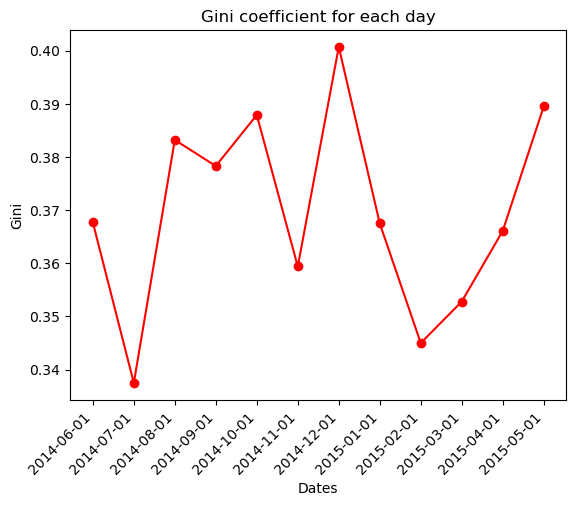

In [469]:

plt.xlabel('Dates')
plt.ylabel('Gini')
plt.title('Gini coefficient for each day')



plt.plot(dates, gini_by_date, color='red', marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.show()

В среднем на каждой из дат значение около 35% (то есть в пределах желтого и зеленого индикаторов), что в целом неплохой результат. Однако стоит иметь ввиду, что данные по датам распределены неоднородно, что может так же влиять на качество ранжирования модели

Тест M4.1: Сравнение прогнозного и фактического TR (Target Rate) на уровне выборки

Если брать изначальные результаты модели, выдаваемые функцией predict, то модель  фактически не определяет дефолтные кредиты. Попробуем подобрать threshold такой, чтобы при вероятности 1 большей чем threshold заемщик будет объявлен дефолтным: сделаю это с помощью  массива test_v_pred, который является результатом работы функции predict_proba и соответсвует второму столбцу массива, возвращаемого функцией, который как раз содержит вероятности события "1".
Таким подбором получилось сделать разницу около 2 процентов в предсказании, что соответсвует зеленому индикатору в тесте

In [470]:

TR_fact = sum(target_val_woe)/len(target_val_woe)
TR_pred = sum(testv_cat)/len(testv_cat)
min_value = 10000
TR_pred_min = 0
j_min = 0
print('Доля дефолтных кредитов,  предсказанная моделью до подбора threshold:', TR_pred)
print('Изначальная ошибка в Target rate:',abs(TR_fact-TR_pred)/TR_fact)
for j in np.arange(0.1, 0.5, 0.005):
    testv_cat = 1*(testv_pred >= j)
    TR_pred = sum(testv_cat)/len(testv_cat)
    if abs(TR_fact-TR_pred)/TR_fact < min_value:
        min_value = abs(TR_fact-TR_pred)/TR_fact
        TR_pred_min = TR_pred
        j_min = j


print('Доля дефолтных кредитов,  предсказанная моделью после подбора threshold:',  TR_pred_min)
print('Фактическая доля дефолтных кредитов:', TR_fact)
print('Threshold:', j_min)
print('Значение относительной разности Target rate в процентах:', min_value*100)

Доля дефолтных кредитов,  предсказанная моделью до подбора threshold: 0.0
Изначальная ошибка в Target rate: 1.0
Доля дефолтных кредитов,  предсказанная моделью после подбора threshold: 0.17526063679909834
Фактическая доля дефолтных кредитов: 0.1767357830706247
Threshold: 0.27000000000000013
Значение относительной разности Target rate в процентах: 0.8346619150332958


Калибровочная кривая


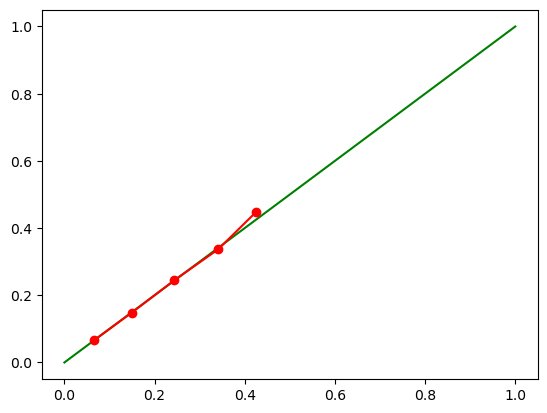

In [471]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(target_val_woe,testv_pred, n_bins=10)

plt.plot([0,1], [0,1], color = 'green')
plt.plot(prob_pred, prob_true, color='red', marker='o', linestyle='-')



Я не поверила функции sklearn и решила построить калибровочную кривую сама, но результат получился точно таким же

In [472]:
calibration = pd.DataFrame()
calibration = pd.concat([X_valv_woe,pd.DataFrame(target_val_woe), pd.DataFrame(testv_pred)], axis =1)
calibration.rename(columns={0: 'pred_proba'}, inplace=True)

bins = np.linspace(0, 1, 11)  
calibration['bin'] = pd.cut(calibration['pred_proba'], bins, labels=False)
result_calibration= calibration.groupby('bin').agg({'def':'mean', 'pred_proba':'mean'}).reset_index()



In [473]:
result_calibration


bin       def  pred_proba
0    0  0.065914    0.065491
1    1  0.148050    0.149096
2    2  0.244672    0.243803
3    3  0.336886    0.341064
4    4  0.447712    0.424979

In [474]:
relative_differences = pd.DataFrame(columns=['relative_difference'])

In [475]:

for index, row in result_calibration.iterrows():
    def_value = row['def']
    red_proba_value = row['pred_proba']
    
    relative_difference = abs((red_proba_value - def_value) / def_value)
    
    relative_differences = relative_differences.append({'relative_difference': relative_difference}, ignore_index=True)
    

/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_43561/2483919401.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_43561/2483919401.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_43561/2483919401.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_43561/2483919401.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_43561/2483919401.py:7: FutureWarning:

The frame.append method is depreca

In [476]:
relative_differences

relative_difference
0             0.006408
1             0.007068
2             0.003550
3             0.012401
4             0.050777

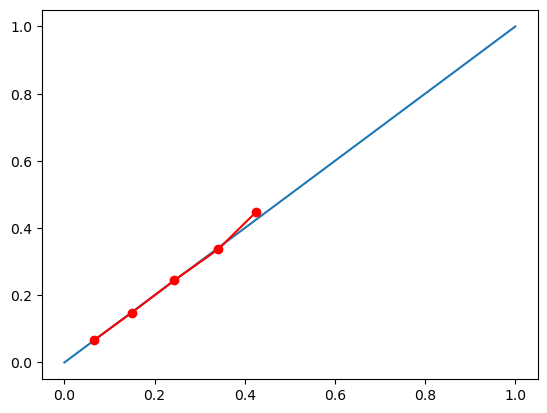

In [477]:

plt.plot([0,1], [0,1])
plt.plot(result_calibration['pred_proba'], result_calibration['def'], color='red', marker='o', linestyle='-')



Тест M3.1: Анализ корректности дискретного преобразования факторов

In [478]:
filtered_dict

{'CUR': 0.05668011190046949,
 'acc_open_past_24mths': 0.03453064773827254,
 'dti': 0.04145522105338506,
 'inq_last_6mths': 0.02998871914254074,
 'mths_since_recent_inq': 0.025085976764350336,
 'sub_grade': 0.34237340827945,
 'annual_inc': 0.035196389709258355,
 'avg_cur_bal': 0.025905517392935232}

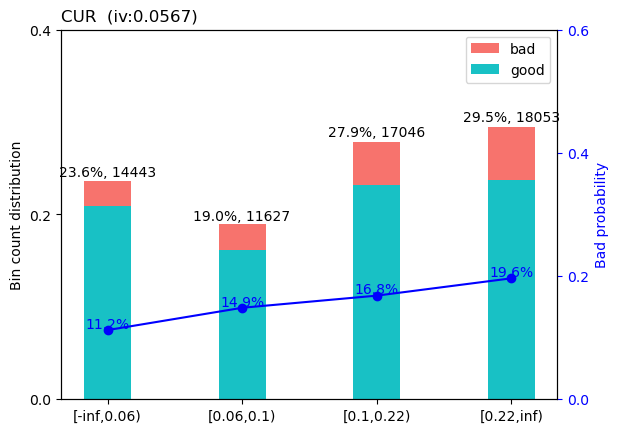

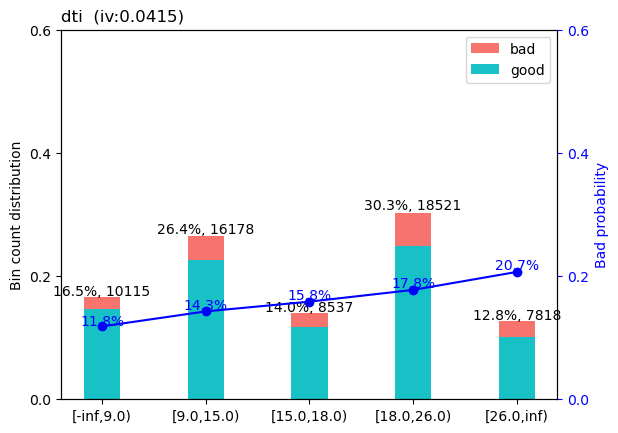

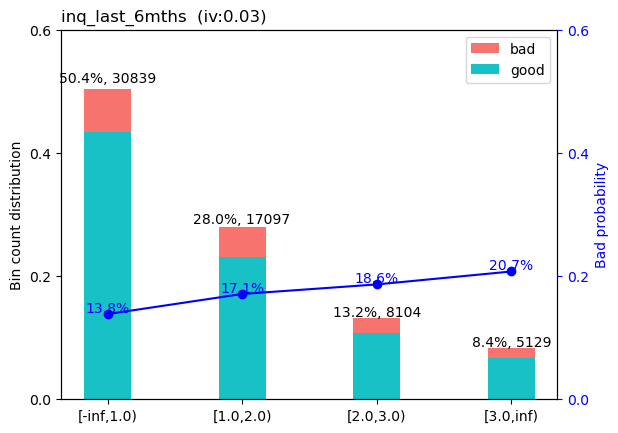

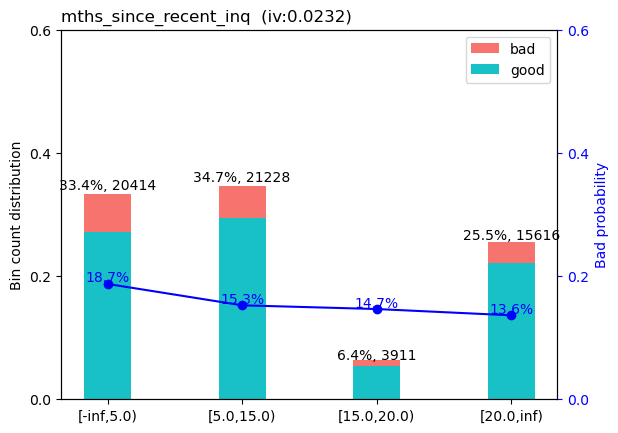

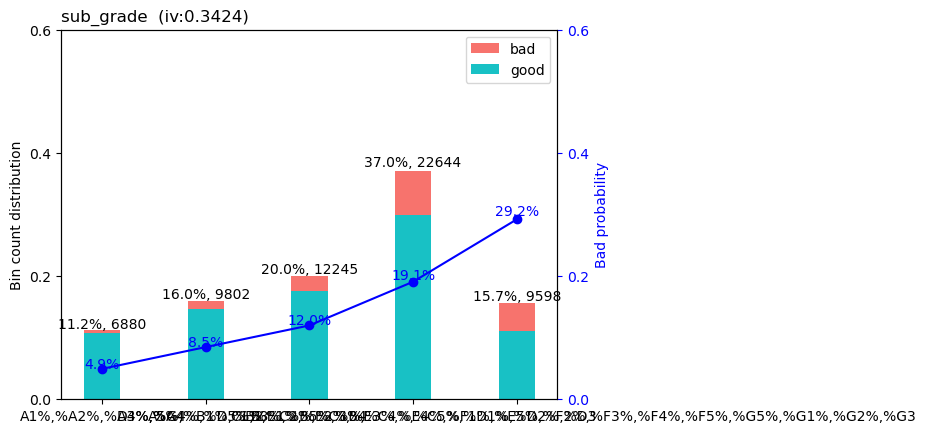

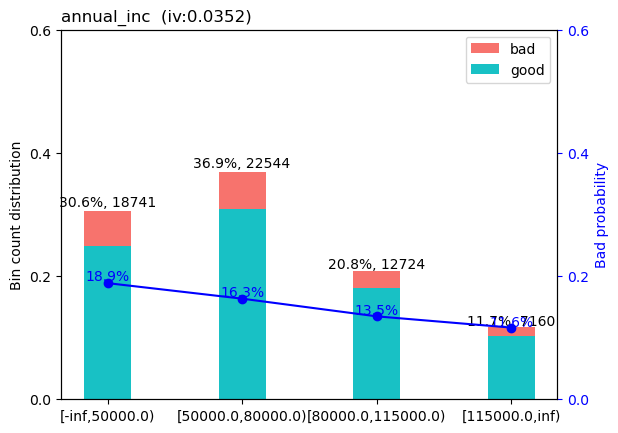

In [479]:
for feature in filtered_dict.keys():
    sc.woebin_plot({feature: bins_adj[feature]})

Как мы видим все признаки получились монотонными по вероятности дефолта, так что модель прошла валидационный тест

# Другие модели машинного обучения ##

**Метод случайного леса (англ. random forest)** — алгоритм машинного обучения, заключающийся в использовании ансамбля решающих деревьев. 

Этот алгоритм основывается на том, что случайным образом строятся несколько деревьев решений, каждое из которых определяет значение класса таргетной переменной  (например, 0 или 1). После этого определяется предсказанное значение таргета : в условиях задачи классификации класс с наибольшим числом голосов от случайных деревье становится прогнозом алгоритма. 

Случайность в построении деревьев достигается таким образом: случайным образом выбираются с повторениями примеры из исходных данных, чтобы создать подвыборки для каждого дерева, далее эти подвыборки делятся на узлы дерева по одному на каждый, и так строится дерево решений различной глубины. Каждое дерево строится по своей подвыборке данных, и они работают независимо друг от друга.

По умолчанию в функции из библиотеки sklearn количество деревьев в лесу - 10.

У функции ```RandomForestClassifier``` существует несколько параметров, но остановимся подробнее на двух основных:
- n_estimators (по умолчанию: 10): Этот параметр указывает количество деревьев в случайном лесе. Большее число деревьев может улучшить качество модели, но также может увеличить время обучения.

- max_depth (по умолчанию: None): Этот параметр ограничивает максимальную глубину каждого дерева в случайном лесе. Если установлено значение None, деревья не будут ограничены по глубине.


Попробуем подобрать эти параметры с помощью рандомизированного поиска, перед этим немного преобразуем датасет для подачи в модель Random Forest: Addr_state, purpose, sub_grade  мы преобразуем так: с помощью category_encoders построим биекцию из множества значений, принимаемых переменной в множество натуральных чисел

In [480]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['purpose', 'addr_state', 'sub_grade'])
df_train = encoder.fit_transform(df_train)

In [481]:
df_train_dummies = pd.get_dummies(df_train['home_ownership'], prefix='home_ownership')
df_train = pd.concat([df_train, df_train_dummies, term_column], axis=1)
df_train.drop('home_ownership', axis=1, inplace=True)

In [482]:
from sklearn.model_selection import train_test_split
target_train  = df_train['def']
df_train_no_woe = df_train.drop(['def'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(df_train_no_woe, target_train, test_size=0.2, random_state=42)


In [483]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtr_scaled = scaler.fit_transform(X_train)
Xval_scaled = scaler.transform(X_val)

Как мы видим, коэффициент Джини остался примерно на том же уровне, что и в случае с логистической регрессией с использованием Woe-преобразований

## Подбор гиперпараметров с помощью библиотеки Optuna ##


Возможно, качество модели можно улучшить, если чуть лучше подобрать гиперпараметры: для проверки этого предположения попробую подобрать гиперпараметры для двух моделей машинного обучения - логистической регрессии и 

In [484]:
!pip install optuna -q


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [485]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [486]:
MLMODEL = "Log"


In [487]:
#сделаю отдельную функцию, которая сразу будет предсказывать значения на валидационном датасете
gini_logreg_optuna = None
gini_randfor_optuna = None
def printresults(model):
  global gini_logreg_optuna
  global gini_randfor_optuna
  if MLMODEL == "Log":
    #обучаю на валидационном датасете
    y_pred = model.predict_proba(testv_woe)[:, 1]
    testv_perf_woe = sc.perf_eva(target_val_woe, y_pred, plot_type = ["roc"], title = "test")
    gini_logreg_optuna = testv_perf_woe['Gini']
    print('Gini coeff test  =' , gini_logreg_optuna)
  if MLMODEL == "RandFor":
    #обучаю уже на валидационном датасете, причем без woe-преобразований
    y_pred = model.predict_proba(Xval_scaled)[:, 1]
    testv_perf_woe = sc.perf_eva(y_val, y_pred, plot_type = ["roc"], title = "test")
    gini_randfor_optuna = testv_perf_woe['Gini']
    print('Gini coeff test  =' , gini_randfor_optuna)
  

In [488]:

def optimize(trial):
  if MLMODEL == "Log":
    model_opt = LogisticRegression(
        C = trial.suggest_float("C", 1e-5, 1e5)
      )
    model_opt.fit(train_woe, y_train_woe)
    y_pred = model_opt.predict_proba(test_woe)[:, 1]
    return roc_auc_score(y_val_woe, y_pred)
  if MLMODEL == "RandFor":
    n_estimators = trial.suggest_int('n_estimators', 100, 310, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, 1)
    max_depth = trial.suggest_int('max_depth', 15, 40, 1)

    model_opt = RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf
                                          )
 
    model_opt.fit(Xtr_scaled,y_train)

    y_pred = model_opt.predict_proba(Xval_scaled)[:, 1]
    return roc_auc_score(y_val_woe, y_pred)

In [489]:
study_logreg = optuna.create_study(study_name="LogisticRegression Optuna Optimization", 
                                   direction="maximize",

                                   )
study_logreg.optimize(optimize, n_trials=25
                    
                      )

print("Наилучшие значения гиперпараметров {}".format(study_logreg.best_params))
print("Roc_auc на тестовой выборке: {:.2f}".format(study_logreg.best_value))

[I 2024-06-12 21:26:36,620] A new study created in memory with name: LogisticRegression Optuna Optimization
[I 2024-06-12 21:26:36,689] Trial 0 finished with value: 0.6855732828690821 and parameters: {'C': 49367.86119157619}. Best is trial 0 with value: 0.6855732828690821.
[I 2024-06-12 21:26:36,744] Trial 1 finished with value: 0.6855732828690821 and parameters: {'C': 66248.37110326864}. Best is trial 0 with value: 0.6855732828690821.
[I 2024-06-12 21:26:36,801] Trial 2 finished with value: 0.6855733826008038 and parameters: {'C': 31123.379671065435}. Best is trial 2 with value: 0.6855733826008038.
[I 2024-06-12 21:26:36,855] Trial 3 finished with value: 0.6855733826008038 and parameters: {'C': 30981.878675872485}. Best is trial 2 with value: 0.6855733826008038.
[I 2024-06-12 21:26:36,909] Trial 4 finished with value: 0.6855734324666646 and parameters: {'C': 1214.9298111182904}. Best is trial 4 with value: 0.6855734324666646.
[I 2024-06-12 21:26:36,965] Trial 5 finished with value: 0.

Наилучшие значения гиперпараметров {'C': 632.2748546926065}
Roc_auc на тестовой выборке: 0.69


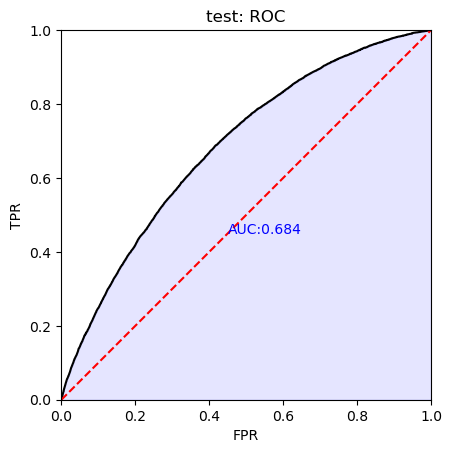

Gini coeff test  = 0.368


In [490]:
model_optuna = LogisticRegression(**study_logreg.best_params,random_state=42)
model_optuna.fit(train_woe, y_train_woe)
result_logreg_optuna = printresults(model_optuna)


In [491]:
MLMODEL = "RandFor"


In [492]:
study_randfor = optuna.create_study(study_name="RandomForest Optuna Optimization", 
                                   direction="maximize",

                                   )
study_randfor.optimize(optimize, n_trials=10
                    
                      )

print("Наилучшие значения гиперпараметров {}".format(study_randfor.best_params))
print("Roc_auc на тестовой выборке: {:.2f}".format(study_randfor.best_value))

[I 2024-06-12 21:26:40,062] A new study created in memory with name: RandomForest Optuna Optimization
/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_43561/2593865203.py:10: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_43561/2593865203.py:11: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_43561/2593865203.py:12: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

[I 2024-06-12 21:26:58,457] Trial 0 finished with value: 0.6768502727662589 and parameters: {'n_estimators': 300, 'min_samples_leaf': 3, 'max_depth': 34}. Best is trial 0 with value: 0.6768502727662589.
/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_43561/259386

Наилучшие значения гиперпараметров {'n_estimators': 240, 'min_samples_leaf': 6, 'max_depth': 36}
Roc_auc на тестовой выборке: 0.68


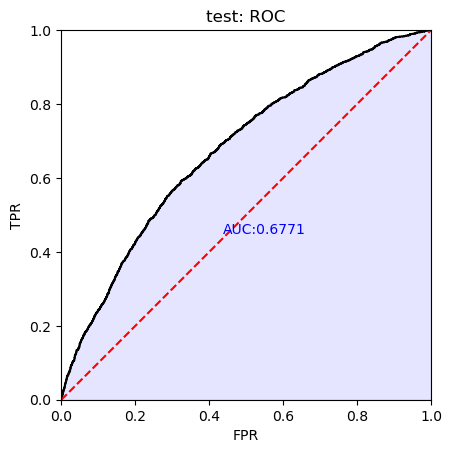

Gini coeff test  = 0.3542


In [493]:
model_optuna = RandomForestClassifier(**study_randfor.best_params,random_state=42)
model_optuna.fit(Xtr_scaled,y_train)

printresults(model_optuna)

# Сравнение моделей #

In [494]:
final_results = pd.DataFrame(columns=['Модель машинного обучения', 'Метод подбора гиперпараметров','Гиперпараметры', 'Коэффициент Джини'])

In [495]:

final_results.loc[len(final_results)] = ['Logistic Regression with WOE', 'Grid Search', {"penalty": 'l2', "C": 0.004281332398719396}, gini_coef_val]
final_results.loc[len(final_results)] = ['Logistic Regression with WOE', 'Optuna library',study_logreg.best_params, gini_logreg_optuna]
final_results.loc[len(final_results)] = ['Randomn Forest', 'Optuna library',study_randfor.best_params, gini_randfor_optuna]


In [496]:
final_results

Модель машинного обучения Метод подбора гиперпараметров  \
0  Logistic Regression with WOE                   Grid Search   
1  Logistic Regression with WOE                Optuna library   
2                Randomn Forest                Optuna library   

                                      Гиперпараметры  Коэффициент Джини  
0       {'penalty': 'l2', 'C': 0.004281332398719396}             0.3681  
1                           {'C': 632.2748546926065}             0.3680  
2  {'n_estimators': 240, 'min_samples_leaf': 6, '...             0.3542

## Скоринговая карта ##

In [497]:
card = sc.scorecard(bins_adj, model_woe, testv_woe.columns)

In [500]:
scoring_card = pd.DataFrame()

In [501]:
for i in card.keys():
    temp_df = pd.DataFrame(card[i])
    scoring_card = pd.concat([scoring_card, temp_df], ignore_index=True)

Получили датасет со значениями очков, которые присваиваются клиенту в случае попадания в определенный бин каждого признака

In [502]:
scoring_card

variable                                                bin  \
0              basepoints                                                NaN   
1                     CUR                                        [-inf,0.06)   
2                     CUR                                         [0.06,0.1)   
3                     CUR                                         [0.1,0.22)   
4                     CUR                                         [0.22,inf)   
5    acc_open_past_24mths                                         [-inf,4.0)   
6    acc_open_past_24mths                                          [4.0,5.0)   
7    acc_open_past_24mths                                          [5.0,8.0)   
8    acc_open_past_24mths                                          [8.0,inf)   
9                     dti                                         [-inf,9.0)   
10                    dti                                         [9.0,15.0)   
11                    dti                                        [15.0,18.0)   
12                    dti                                        [18.0,26.0)   
13                    dti                                         [26.0,inf)   
14             annual_inc                                     [-inf,50000.0)   
15             annual_inc                                  [50000.0,80000.0)   
16             annual_inc                                 [80000.0,115000.0)   
17             annual_inc                                     [115000.0,inf)   
18         inq_last_6mths                                         [-inf,1.0)   
19         inq_last_6mths                                          [1.0,2.0)   
20         inq_last_6mths                                          [2.0,3.0)   
21         inq_last_6mths                                          [3.0,inf)   
22  mths_since_recent_inq                                         [-inf,5.0)   
23  mths_since_recent_inq                                         [5.0,15.0)   
24  mths_since_recent_inq                                        [15.0,20.0)   
25  mths_since_recent_inq                                         [20.0,inf)   
26            avg_cur_bal                                     [-inf,15000.0)   
27            avg_cur_bal                                  [15000.0,25000.0)   
28            avg_cur_bal                                  [25000.0,75000.0)   
29            avg_cur_bal                                      [75000.0,inf)   
30              sub_grade                                  A1%,%A2%,%A3%,%A4   
31              sub_grade                                       A5%,%B1%,%B2   
32              sub_grade                                       B3%,%B5%,%B4   
33              sub_grade              C1%,%C2%,%C3%,%C4%,%C5%,%D1%,%D2%,%D3   
34              sub_grade  D4%,%G4%,%D5%,%E1%,%E2%,%E3%,%E4%,%F1%,%E5%,%F...   

    points  
0    508.0  
1     22.0  
2      5.0  
3     -3.0  
4    -14.0  
5      8.0  
6     -1.0  
7     -9.0  
8    -19.0  
9     15.0  
10     6.0  
11     0.0  
12    -5.0  
13   -13.0  
14   -13.0  
15    -2.0  
16    12.0  
17    23.0  
18     4.0  
19    -2.0  
20    -5.0  
21    -8.0  
22    -1.0  
23     0.0  
24     0.0  
25     1.0  
26     5.0  
27    -6.0  
28    -6.0  
29   -40.0  
30    82.0  
31    45.0  
32    21.0  
33   -14.0  
34   -49.0

In [503]:
train_score = sc.scorecard_ply(df_train_woe, card, print_step=0)
val_score = sc.scorecard_ply(df_val_woe, card, print_step=0)

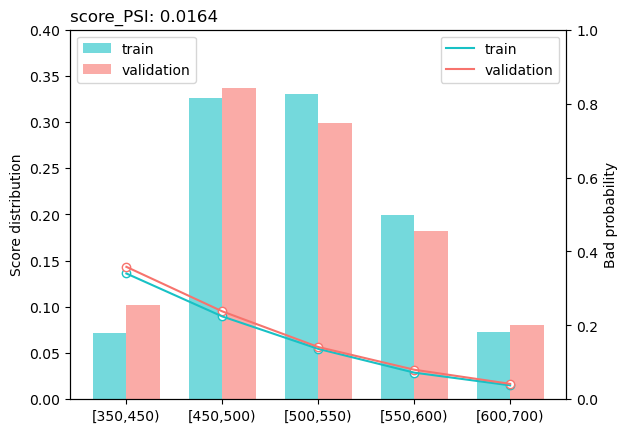

{'psi':   variable       PSI
 0    score  0.016388,
 'pic': {'score': <Figure size 640x480 with 2 Axes>}}

In [504]:
sc.perf_psi(
  score = {'train':train_score, 'validation':val_score},
  label = {'train':target, 'validation':target_val_woe}
)

## Подсчет ожидаемой прибыли ##


Алгоритм расчета прибыли:

Ожидаемая прибыль для каждого кредита рассчитывается по формуле:
expected_profit = 'installment' * 'term' - 'funded_amnt'

Фактическая прибыль может принимать разные значения в зависимости от предсказания модели и реального значения таргетной переменной:

- Если предсказано и фактически нет дефолта: прибыль равна ожидаемой прибыли.
- Если предсказано отсутствие дефолта, но фактически он имеет место: прибыль равна -LGD.
- Если предсказан дефолт, независимо от фактического результата: прибыль банка равна нулю, так как банк принимает решение не выдавать клиенту кредит.


In [505]:
df_start_woe = sc.woebin_ply(df_train_woe, bins_adj)


[INFO] converting into woe values ...


In [506]:

def benefit_plot(model, woe_dataset, woe_target,validation_woe_dataset, validation_target ,testdataset_beforewoe, valdataset_beforewoe, lgd):
    plt.figure(figsize=(10,8))
    
    colors = ['olivedrab', 'deepskyblue', 'salmon']
    
    max_val = []
    for it, i in enumerate(['train', 'val']):
        if i == 'train':
            X = woe_dataset
            y = woe_target
            fund = testdataset_beforewoe
        elif i == 'val':
            X = validation_woe_dataset
            y =  validation_target
            fund = valdataset_beforewoe
        benefit = []    
        acceptance_rate = []
        y_hat = model.predict_proba(X)[:, 1]
        profit_df = pd.DataFrame()
        thr = np.linspace(0, 1, 50)
        
        for t in thr:
            acceptance_rate.append(t)
            y_pred = [1 if prob >= t else 0 for prob in y_hat]
            profit_df['model'] = y_pred
            profit_df['actual'] = y
            
            profit_df['expected_profit']  = fund['installment'] * fund['term'] - fund['funded_amnt']
            
            profit_df.loc[(profit_df['model'] == 0) & (profit_df['actual'] == 0), 'actual_profit'] = profit_df['expected_profit']
            profit_df.loc[(profit_df['model'] == 0) & (profit_df['actual'] == 1), 'actual_profit'] = -lgd*fund['funded_amnt']
            profit_df.loc[(profit_df['model'] == 1) & (profit_df['actual'] == 0), 'actual_profit'] = 0

            
            
            benefit.append(profit_df['actual_profit'].sum())
    
        print('Model', i, 'Max Benefit: ', np.max(benefit)) 
        print('Optimal threshold:', acceptance_rate[np.argmax(benefit)])
        plt.plot(acceptance_rate, benefit, label=i, color=colors[it], linewidth=2)  
        plt.plot(acceptance_rate[np.argmax(benefit)], np.max(benefit), color=colors[it], marker='*', markersize=10)
         
    plt.xlabel('Acceptance rate')
    plt.ylabel('Benefit')
    plt.title('Benefit curve for model')
    plt.legend(bbox_to_anchor=(1, 1))
    _ = plt.legend(loc=0, prop={'size': 16})


Model train Max Benefit:  70678618.80000001
Optimal threshold: 0.32653061224489793
Model val Max Benefit:  54519104.84
Optimal threshold: 0.32653061224489793


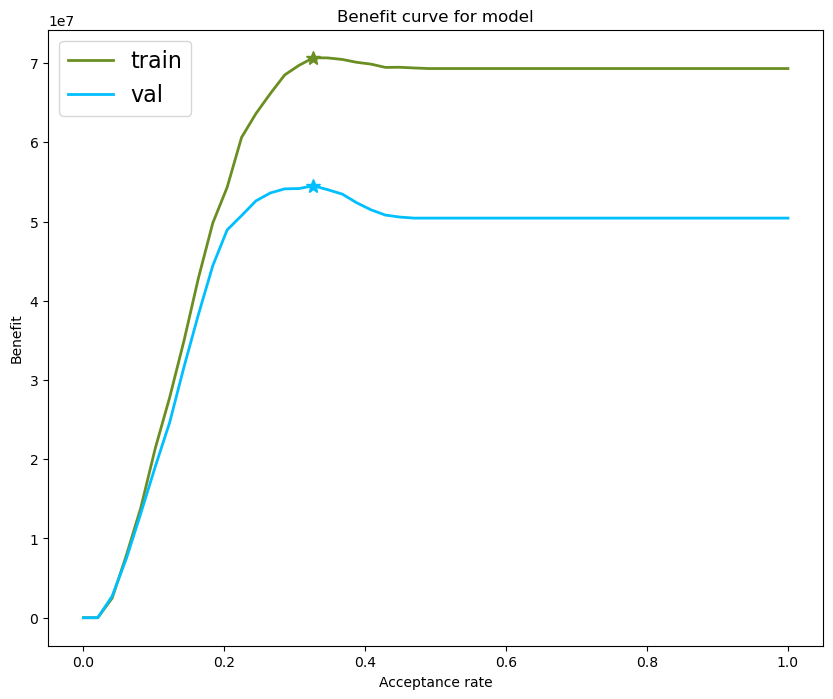

In [507]:
benefit_plot(model_woe, df_start_woe, target, testv_woe, target_val_woe,df_start,val_start, 1)

График демонстрирует, что на двух выборках максимальная прибыль была достигнута при установлении порога принятия решения о дефолте при предсказанной вероятности дефолта около 0.32.


In [508]:
benefit_plot(model_woe, df_start_woe, target, testv_woe, target_val_woe,df_start,val_start, 0.8)

Model train Max Benefit:  99133557.52
Optimal threshold: 0.4081632653061224
Model val Max Benefit:  84623771.68
Optimal threshold: 0.36734693877551017
